In [1]:
%store -r agreements 
len(agreements)

97

In [2]:
import spacy
nlp = spacy.load('de_core_news_md')

In [3]:
#analytics on hand-annotated data

In [14]:
agr_emo = []#21
agr_no_emo = [] #76
for t in agreements:
    if t[1] == "0":
        agr_no_emo.append(t[0])
    elif t[1] == "1":
        agr_emo.append(t[0])
len(agr_no_emo)

76

In [15]:
import random
no_emo = []
for i in range(21):
    no_emo.append(random.choice(agr_no_emo))


In [16]:
#post length and number of punctuation of emotional posts
import string
from nltk import tokenize
hash_post_length = []
hash_sent_length = []
hash_number_of_punct = []
tokenized_posts = []
counter = 0
for post in agr_emo:
    hash_sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts.append(tokenize.sent_tokenize(post))
    hash_post_length.append(len(post.split()))
    for i in post:
        if i in string.punctuation:
            counter+=1
    hash_number_of_punct.append(counter)
    counter = 0
    
sentence_legths = []
for post in tokenized_posts:
    for sentence in post:
        sentence_legths.append(len(sentence.split())) 
        
#post length and number of punctuation of non-emotional posts
counter_ = 0
hash_non_emot_post_length = []
hash_non_emot_number_of_punct = []
non_emot_hash_sent_length = []
tokenized_posts_not = []
for post in no_emo:
    non_emot_hash_sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts_not.append(tokenize.sent_tokenize(post))
    hash_non_emot_post_length.append(len(post.split()))
    for i in post:
        if i in string.punctuation:
            counter_+=1
    hash_non_emot_number_of_punct.append(counter_)
    counter_ = 0

    
sentence_legths_not = []
for post in tokenized_posts_not:
    for sentence in post:
        sentence_legths_not.append(len(sentence.split())) 

#number of specially emotional emojis
#emojis = ["😫","🤮", "😣", "😕", "😍", "🙄" , "😅", "😢", "😂", "🥰"]
emojis = ["😷","😫","🤮", "😣", "😕", "😍", "😞", "😢", "😂", "🥰", "😭",
          "😱", "😒", "😔","😕", "😖", "😫", "😤", "😠", "😡", "🤬","😪"] 
hash_average_num_of_emoji_in_emot = 0
hash_average_num_of_emoji_in_not_emot = 0
hash_counter = 0
hash_emot_num_emoji = []
for post in agr_emo:
    for c in post:
        if c in emojis:
            #print(post)
            hash_counter+=1
    hash_emot_num_emoji.append(hash_counter)
    hash_counter = 0
print("average number of emotional emojis in emotional posts",sum(hash_emot_num_emoji)/len(agr_emo))
hash_counter_ = 0
hash_not_emot_num_emoji = []
for post in no_emo:
    for c in post:
        if c in emojis:
            #print(post)
            hash_counter_+=1
    hash_not_emot_num_emoji.append(hash_counter_)
    hash_counter_ = 0
print("average number of emotional emojis in non_emotional posts", sum(hash_not_emot_num_emoji)/len(no_emo))
print("ANALYTICS ON HANDANNOTATED DATA")
print("average post_legth of emotional posts: ", sum(hash_post_length) / len(hash_post_length))
print("average post_legth of non_emotional posts: ", sum(hash_non_emot_post_length) / len(hash_non_emot_post_length))
print("average number of punctuation of emotional posts: ", sum(hash_number_of_punct) / len(hash_number_of_punct))
print("average number of punctuation of non_emotional posts: ", sum(hash_non_emot_number_of_punct) / len(hash_non_emot_number_of_punct))
print("average number of specially emotional emojis in emotional posts: ", sum(hash_emot_num_emoji) / len(hash_emot_num_emoji))
print("average number of specially emotional emojis in NON-emotional posts: ", sum(hash_not_emot_num_emoji) / len(hash_not_emot_num_emoji))
print("average number of sentences in emotional posts: ", sum(hash_sent_length)/len(hash_sent_length))
print("average number of sentences in NONemotional posts: ", sum(non_emot_hash_sent_length)/len(non_emot_hash_sent_length))
print("average sentence length of emotional posts ", sum(sentence_legths)/len(sentence_legths)) 
print("average sentence length of non_emotional posts ", sum(sentence_legths_not)/len(sentence_legths_not)) 


average number of emotional emojis in emotional posts 0.19047619047619047
average number of emotional emojis in non_emotional posts 0.0
ANALYTICS ON HANDANNOTATED DATA
average post_legth of emotional posts:  20.142857142857142
average post_legth of non_emotional posts:  12.666666666666666
average number of punctuation of emotional posts:  4.666666666666667
average number of punctuation of non_emotional posts:  2.4285714285714284
average number of specially emotional emojis in emotional posts:  0.19047619047619047
average number of specially emotional emojis in NON-emotional posts:  0.0
average number of sentences in emotional posts:  2.0476190476190474
average number of sentences in NONemotional posts:  1.7142857142857142
average sentence length of emotional posts  9.837209302325581
average sentence length of non_emotional posts  7.388888888888889


In [17]:
#pos tags emoj

#emot
emoj_emotional_spacy = []
emoj_pos_tag_emot = []
for post in agr_emo:
    emoj_emotional_spacy.append(nlp(post))

for post in emoj_emotional_spacy:
    for token in post:
        emoj_pos_tag_emot.append(token.tag_)
        #print(token, token.tag_, token.pos_)
#not emot        
non_emoj_emotional_spacy = []
non_emoj_pos_tag_emot = []
for post in no_emo:
    non_emoj_emotional_spacy.append(nlp(post))

for post in non_emoj_emotional_spacy:
    for token in post:
        non_emoj_pos_tag_emot.append(token.tag_)
        print(token, token.tag_, token.pos_)
        
        
#sort lists
emoj_sorted_emot_tags = sorted(emoj_pos_tag_emot)
emoj_sorted_non_emot_tags = sorted(non_emoj_pos_tag_emot)

emoj_pos_tags = []
emoj_counts = []
from collections import Counter
for key, val in Counter(emoj_sorted_emot_tags).items():
    emoj_pos_tags.append(key)
    emoj_counts.append(val)
    
emoj_nonemot_pos_tags = []
emoj_nonemot_counts = []
for key, val in Counter(emoj_sorted_non_emot_tags).items():
    emoj_nonemot_pos_tags.append(key)
    emoj_nonemot_counts.append(val)
    
#get all counts, also 0-counts
#create list with all postags
emoj_all_tags = list(set(emoj_nonemot_pos_tags+emoj_pos_tags))

#counts all in emotional data
emoj_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_emot_counts_and_tags.append((tag, emoj_pos_tag_emot.count(tag)))
    
#count all pos tags in non_emotional data
emoj_non_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_non_emot_counts_and_tags.append((tag, non_emoj_pos_tag_emot.count(tag)))
#print("NOT EMOTIONAL")
#print(emoj_non_emot_counts_and_tags)
#print("EMOTIONAL")
#print(emoj_emot_counts_and_tags)

#get lists for plotting
emoji_tags = []
emoj_count_emot = []
emoj_count_non_emot = []
for tup in emoj_emot_counts_and_tags:
    emoji_tags.append(tup[0])
    emoj_count_emot.append(tup[1])
for tup in emoj_non_emot_counts_and_tags:
    emoj_count_non_emot.append(tup[1])
print(emoji_tags)

Ich PPER PRON
gehe VVFIN VERB
mich PPER PRON
des ART DET
kots NN NOUN
entledigen VVINF VERB
. $. PUNCT
Jodelst VVFIN VERB
du PPER PRON
wieder ADV ADV
? $. PUNCT
  _SP SPACE
# NE PROPN
derjodlerisback FM X
Was PWS PRON
wäre VAFIN AUX
denn ADV ADV
eine ART DET
realistische ADJA ADJ
Vergütung NN NOUN
im APPRART ADP
Praxissemester NN NOUN
? $. PUNCT
Im APPRART ADP
Bereich NN NOUN
IT-Consulting NN NOUN
Darf VMFIN VERB
das ART DET
Arbeitsamt NN NOUN
mir PPER PRON
sagen VVFIN VERB
dass KOUS SCONJ
sie PPER PRON
mir PPER PRON
nichtmehr ADV ADV
weiterhilft VVFIN VERB
weil KOUS SCONJ
ich PPER PRON
bald ADV ADV
kein PIAT DET
als KOKOM CCONJ
mehr PIS PRON
bekomme VVFIN VERB
und KON CCONJ
aus APPR ADP
gesundheitlichen ADJA ADJ
gründen NN NOUN
eine ART DET
Umschulung NN NOUN
/ $( PUNCT
Weiterbildung NN NOUN
brauche VVFIN VERB
? $. PUNCT
Wie PWAV ADV
siehts VVFIN VERB
in APPR ADP
Tü NE PROPN
eigentlich ADV ADV
mit APPR ADP
Esport NN NOUN
aus PTKVZ ADP
? $. PUNCT
Vor APPR ADP
allem PIS PRON
LoL NE PROP

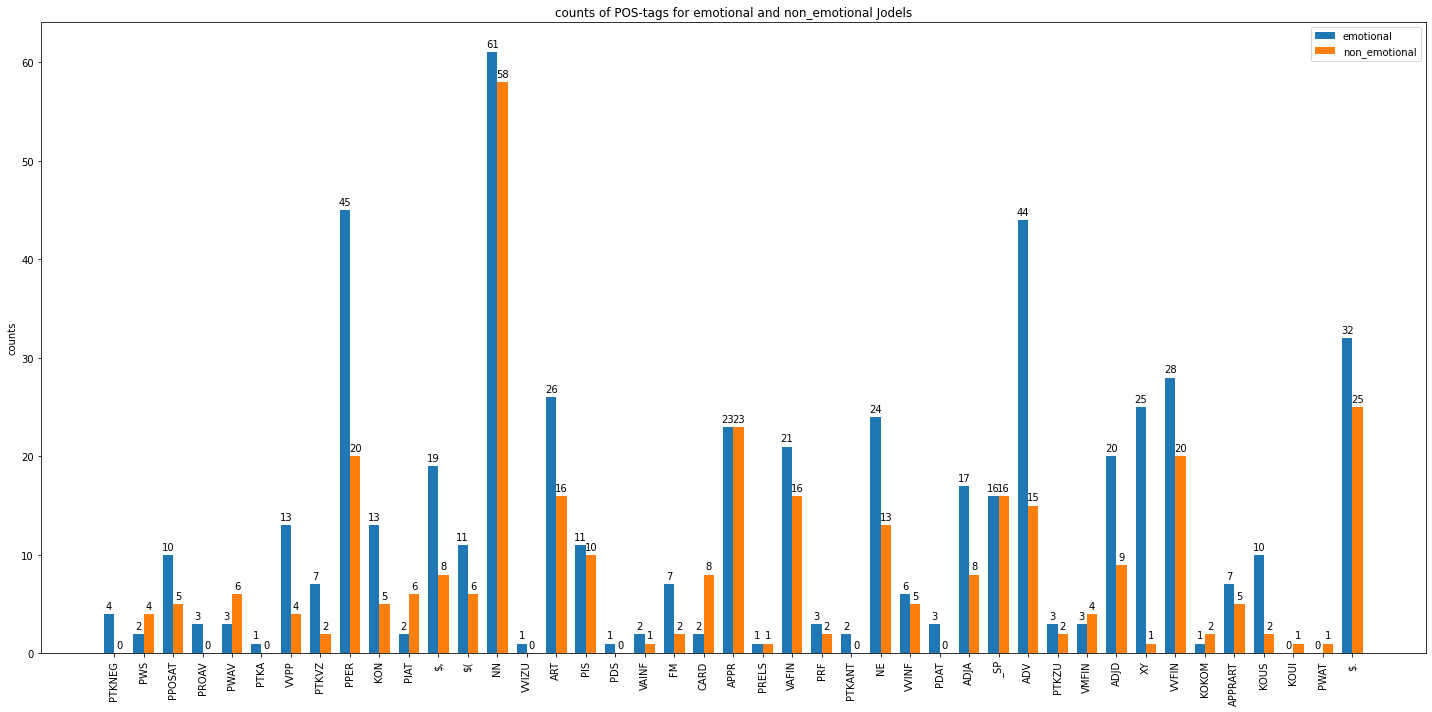

In [18]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = emoji_tags
emotional = emoj_count_emot
non_emotional = emoj_count_non_emot

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
color = (0.2, 0.4)
#plt.figure(figsize=(30,50))
fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, emotional, width, label='emotional')
rects2 = ax.bar(x + width/2, non_emotional, width, label='non_emotional')
#plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('counts')
ax.set_title('counts of POS-tags for emotional and non_emotional Jodels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig("handannotated_postag_distribution.jpg")
#ig.savefig('temp.png', dpi=fig.dpi)


In [38]:
#test hashtag distribution in handannotated data


num_emo = 0
num_no_emo = 0
for post in agr_emo:
    if "#" in post:
        num_emo +=1
        print(post)
print("############################################")
for post in agr_no_emo:
    if "#" in post:
        num_no_emo +=1
        print(post)
print(num_emo, "AND", num_no_emo)       

Alle 11 Minuten verlier ich einen potentiellen Partner wegen Parship.  #dankemerkel
Irgendwie fühle ich mich richtig einsam zur Zeit.  #mimimi
Alle regen sich wegen den verfrühten Böllern auf, ich verstehe es nicht...  Die in Syrien böllern schon das ganze Jahr und keinen störts..  #goingtohell
Wenn der Vater zu einem im streit sagt, dass er einen gleich so schlägt, dass alles einschwillt  #fröhlicheweihnachten
Fuck my life ich steh hart auf dich aber du hast nen Freund 🙄  #fml #wünschteduwärstsingle
Todes gelangweilt und an zu Hause gefesselt dank der Bahn...  #DBakel
Weihnachten  letztes Jahr war voller Vorfreude...  In diesem Jahr ging die Beziehung  flöten  und meine Mutter ist gestorben 😔  #irgendwiekacke
Ich fühl mich irgendwie verarscht. Ich versuche, meinen Freunden regelmäßig zu schreiben und den Kontakt zu halten, aber gefühlt wird nie geantwortet und wenn überhaupt nur Tage später oder weil man was von mir will.  #dankefürnix
Ich hasse die Deutsche Bahn warum sind da so inko

In [19]:
############################analytics on hashtagged data#######################################
%store -r tupl_hash
hash_emot = []
hash_not = []
for tupl in tupl_hash:
    if tupl[1] == 1:
        hash_emot.append(tupl[0])
    else:
        hash_not.append(tupl[0])
hash_not = hash_not[:97] #damit gleich groß        



In [20]:
#muss ich hier die gecleante version raus nehmen nein, tupl_hash ist nicht sauber
#clean
hash_clean = []
post_without = []
for post in hash_emot:
    for word in post.split(" "):
        if not word.startswith("#"):
            #print(word)
            post_without.append(word)
    hash_clean.append(" ".join((" ".join(post_without)).split()))
    post_without = []
hash_emot = hash_clean

not_hash_clean = []
not_post_without = []
for post in hash_not:
    for word in post.split(" "):
        if not word.startswith("#"):
            #print(word)
            not_post_without.append(word)
    not_hash_clean.append(" ".join((" ".join(not_post_without)).split()))
    not_post_without = []
hash_not = not_hash_clean

In [21]:
#post length and number of punctuation of emotional posts
hash_post_length = []
hash_sent_length = []
hash_number_of_punct = []
tokenized_posts = []
counter = 0
for post in hash_emot:
    hash_sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts.append(tokenize.sent_tokenize(post))
    hash_post_length.append(len(post.split()))
    for i in post:
        if i in string.punctuation:
            counter+=1
    hash_number_of_punct.append(counter)
    counter = 0
    
sentence_legths = []
for post in tokenized_posts:
    for sentence in post:
        sentence_legths.append(len(sentence.split())) 
        
#post length and number of punctuation of non-emotional posts
counter_ = 0
hash_non_emot_post_length = []
hash_non_emot_number_of_punct = []
non_emot_hash_sent_length = []
tokenized_posts_not = []
for post in hash_not:
    non_emot_hash_sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts_not.append(tokenize.sent_tokenize(post))
    hash_non_emot_post_length.append(len(post.split()))
    for i in post:
        if i in string.punctuation:
            counter_+=1
    hash_non_emot_number_of_punct.append(counter_)
    counter_ = 0

    
sentence_legths_not = []
for post in tokenized_posts_not:
    for sentence in post:
        sentence_legths_not.append(len(sentence.split())) 

#number of specially emotional emojis
emojis = ["😫","🤮", "😣", "😕", "😍", "🙄" , "😅", "😢", "😂", "🥰"]
hash_average_num_of_emoji_in_emot = 0
hash_average_num_of_emoji_in_not_emot = 0
hash_counter = 0
hash_emot_num_emoji = []
for post in hash_emot:
    for c in post:
        if c in emojis:
            hash_counter+=1
    hash_emot_num_emoji.append(hash_counter)
    hash_counter = 0
print(sum(hash_emot_num_emoji)/len(hash_emot))
hash_counter_ = 0
hash_not_emot_num_emoji = []
for post in hash_not:
    for c in post:
        if c in emojis:
            hash_counter_+=1
    hash_not_emot_num_emoji.append(hash_counter_)
    hash_counter_ = 0
print(sum(hash_not_emot_num_emoji)/len(hash_not))
print("ANALYTICS ON HASHTAG DATA")
print("average post_legth of emotional posts: ", sum(hash_post_length) / len(hash_post_length))
print("average post_legth of non_emotional posts: ", sum(hash_non_emot_post_length) / len(hash_non_emot_post_length))
print("average number of punctuation of emotional posts: ", sum(hash_number_of_punct) / len(hash_number_of_punct))
print("average number of punctuation of non_emotional posts: ", sum(hash_non_emot_number_of_punct) / len(hash_non_emot_number_of_punct))
print("average number of specially emotional emojis in emotional posts: ", sum(hash_emot_num_emoji) / len(hash_emot_num_emoji))
print("average number of specially emotional emojis in NON-emotional posts: ", sum(hash_not_emot_num_emoji) / len(hash_not_emot_num_emoji))
print("average number of sentences in emotional posts: ", sum(hash_sent_length)/len(hash_sent_length))
print("average number of sentences in NONemotional posts: ", sum(non_emot_hash_sent_length)/len(non_emot_hash_sent_length))
print("average sentence length of emotional posts ", sum(sentence_legths)/len(sentence_legths)) 
print("average sentence length of non_emotional posts ", sum(sentence_legths_not)/len(sentence_legths_not)) 


0.08247422680412371
0.010309278350515464
ANALYTICS ON HASHTAG DATA
average post_legth of emotional posts:  20.68041237113402
average post_legth of non_emotional posts:  16.463917525773194
average number of punctuation of emotional posts:  3.8762886597938144
average number of punctuation of non_emotional posts:  2.917525773195876
average number of specially emotional emojis in emotional posts:  0.08247422680412371
average number of specially emotional emojis in NON-emotional posts:  0.010309278350515464
average number of sentences in emotional posts:  1.8041237113402062
average number of sentences in NONemotional posts:  1.731958762886598
average sentence length of emotional posts  11.485714285714286
average sentence length of non_emotional posts  9.505952380952381


In [22]:
#pos tags hashtags

#emot
hash_emotional_spacy = []
hash_pos_tag_emot = []
for post in hash_emot:
    hash_emotional_spacy.append(nlp(post))

for post in hash_emotional_spacy:
    for token in post:
        hash_pos_tag_emot.append(token.tag_)
        #print(token, token.tag_, token.pos_)
#not emot        
non_hash_emotional_spacy = []
non_hash_pos_tag_emot = []
for post in hash_not:
    non_hash_emotional_spacy.append(nlp(post))

for post in non_hash_emotional_spacy:
    for token in post:
        non_hash_pos_tag_emot.append(token.tag_)
        print(token, token.tag_, token.pos_)
        
        
#sort lists
hash_sorted_emot_tags = sorted(hash_pos_tag_emot)
hash_sorted_non_emot_tags = sorted(non_hash_pos_tag_emot)

hash_pos_tags = []
hash_counts = []
from collections import Counter
for key, val in Counter(hash_sorted_emot_tags).items():
    hash_pos_tags.append(key)
    hash_counts.append(val)
    
hash_nonemot_pos_tags = []
hash_nonemot_counts = []
for key, val in Counter(hash_sorted_non_emot_tags).items():
    hash_nonemot_pos_tags.append(key)
    hash_nonemot_counts.append(val)
    
#get all counts, also 0-counts
#create list with all postags
hash_all_tags = list(set(hash_nonemot_pos_tags+hash_pos_tags))

#counts all in emotional data
hash_emot_counts_and_tags = []
for tag in hash_all_tags:
    hash_emot_counts_and_tags.append((tag, hash_pos_tag_emot.count(tag)))
    
#count all pos tags in non_emotional data
hash_non_emot_counts_and_tags = []
for tag in hash_all_tags:
    hash_non_emot_counts_and_tags.append((tag, non_hash_pos_tag_emot.count(tag)))
#print("NOT EMOTIONAL")
#print(hash_non_emot_counts_and_tags)
#print("EMOTIONAL")
#print(hash_emot_counts_and_tags)

#get lists for plotting
hash_tags = []
hash_count_emot = []
hash_count_non_emot = []
for tup in hash_emot_counts_and_tags:
    hash_tags.append(tup[0])
    hash_count_emot.append(tup[1])
for tup in hash_non_emot_counts_and_tags:
    hash_count_non_emot.append(tup[1])
hash_tags

10 CARD NUM
% NN NOUN
flixbus NN NOUN
Gutschein NN NOUN
, $, PUNCT
nur ADV ADV
in APPR ADP
der ART DET
App NN NOUN
einlösbar ADJD ADJ
: $. PUNCT
VCA9744K4GE NE PROPN
Gibt VVFIN VERB
es PPER PRON
gerade ADV ADV
in APPR ADP
Tü NE PROPN
irgendwo ADV ADV
günstig ADJD ADJ
Gästematratzen NN NOUN
zu PTKZU PART
kaufen VVINF VERB
? $. PUNCT
Diese PDAT DET
klappbaren VVFIN VERB
... $( PUNCT
Kurze ADJA ADJ
Frage NN NOUN
: $. PUNCT
was PWS PRON
kann VMFIN VERB
man PIS PRON
gegen APPR ADP
die ART DET
Luft NN NOUN
( $( PUNCT
die PRELS PRON
man PIS PRON
bei APPR ADP
einer ART DET
Bauch NN NOUN
op ADV ADV
reingepumpt NE PROPN
bekommt VVFIN VERB
) $( PUNCT
machen VVINF VERB
? $. PUNCT
Schonmal ADV ADV
jemand PIAT DET
Strafantrag NN NOUN
( $( PUNCT
nicht PTKNEG PART
Anzeige NN NOUN
! $. PUNCT
) $( PUNCT
gestellt VVPP VERB
& KON CCONJ
kann VMFIN VERB
mir PPER PRON
sagen VVINF VERB
, $, PUNCT
wann PWAV ADV
er PPER PRON
mal ADV ADV
irgendwas PIS PRON
von APPR ADP
der ART DET
staatsanwaltschaft NN NOUN
gehö

Herrenberg NE PROPN
und KON CCONJ
hat VAFIN AUX
2 CARD NUM
Plätze NN NOUN
frei PTKVZ ADP
? $. PUNCT
Wird VAFIN AUX
ein ART DET
Eigenreflex NN NOUN
( $( PUNCT
Achillessehne NN NOUN
) $( PUNCT
bzw. KON CCONJ
Die ART DET
muskelantwort NN NOUN
stärker ADJD ADJ
, $, PUNCT
wenn KOUS SCONJ
man PIS PRON
stärker ADJD ADJ
draufschlägt VVFIN VERB
? $. PUNCT
Hat VAFIN AUX
hier ADV ADV
zufällig ADJD ADJ
jemand PIS PRON
einen ART DET
TSA007 ADJA ADJ
Schlüssel NN NOUN
und KON CCONJ
ist VAFIN AUX
mobil ADJD ADJ
/ $( PUNCT
würde VAFIN AUX
ihn PPER PRON
uns PPER PRON
ganz ADV ADV
kurz ADJD ADJ
bringen VVINF VERB
und KON CCONJ
benutzen VVINF VERB
lassen VVINF VERB
? $. PUNCT
Hallo PTKANT PART
, $, PUNCT
ich PPER PRON
muss VMFIN VERB
gerade ADV ADV
für APPR ADP
Statistik NN NOUN
eine ART DET
Wahrscheinlichkeitsaufgabe NN NOUN
machen VVINF VERB
und KON CCONJ
tue VVFIN VERB
mich PPER PRON
recht ADJD ADJ
schwer ADJD ADJ
, $, PUNCT
weil KOUS SCONJ
der ART DET
Stoff NN NOUN
aus APPR ADP
der ART DET
Schule NN N

['PTKNEG',
 'PWS',
 'PPOSAT',
 'PROAV',
 'PWAV',
 'PTKA',
 'VVPP',
 'PTKVZ',
 'VVIMP',
 'ITJ',
 'PPER',
 'KON',
 'PIAT',
 '$,',
 '$(',
 'NN',
 'VVIZU',
 'ART',
 'PDS',
 'PIS',
 'VAINF',
 'FM',
 'CARD',
 'APPR',
 'PRELS',
 'VAFIN',
 'VMINF',
 'PRF',
 'PTKANT',
 'NE',
 'VVINF',
 'PDAT',
 'ADJA',
 'VAPP',
 'APZR',
 'ADV',
 'PTKZU',
 'VMFIN',
 'ADJD',
 'XY',
 'VVFIN',
 'KOKOM',
 'APPRART',
 'KOUS',
 'KOUI',
 'PWAT',
 '$.']

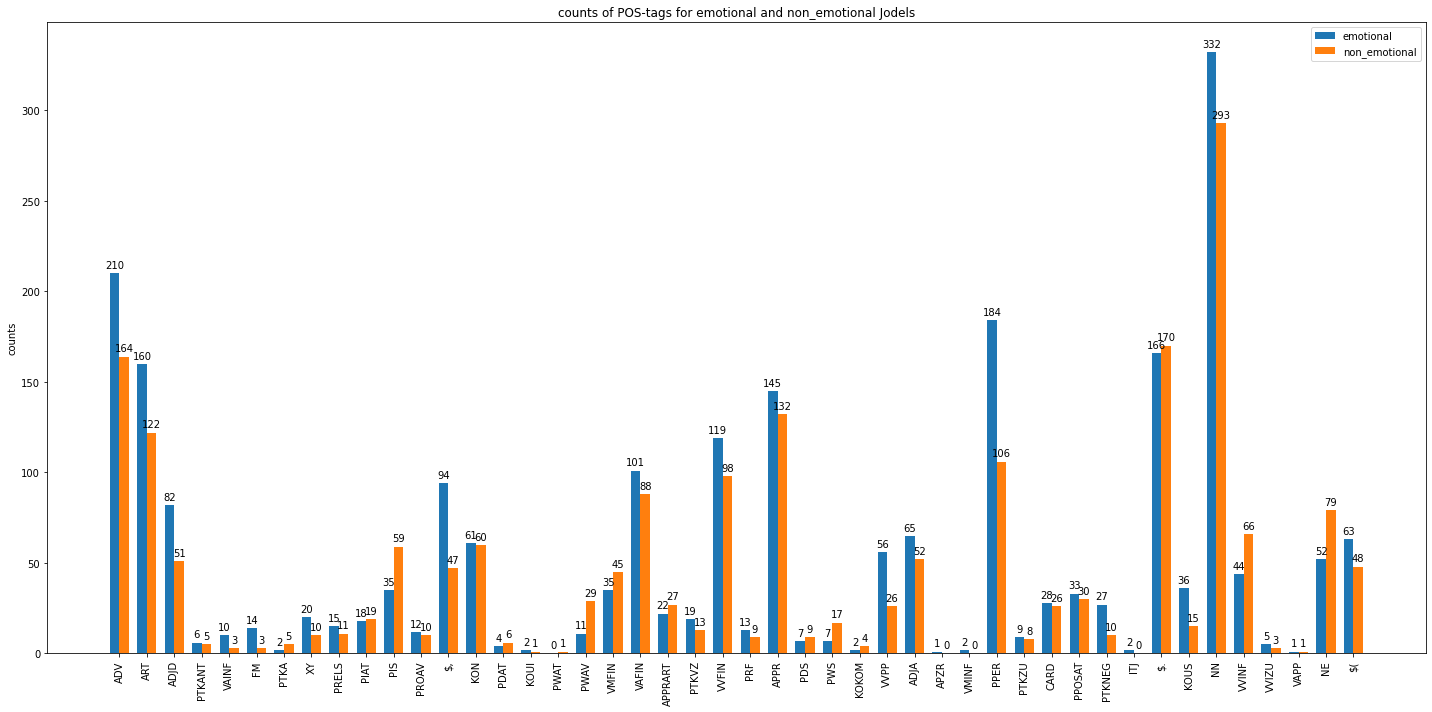

In [36]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = hash_tags
emotional = hash_count_emot
non_emotional = hash_count_non_emot

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
color = (0.2, 0.4)
#plt.figure(figsize=(30,50))
fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, emotional, width, label='emotional')
rects2 = ax.bar(x + width/2, non_emotional, width, label='non_emotional')
#plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('counts')
ax.set_title('counts of POS-tags for emotional and non_emotional Jodels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig("HASHTAG_postag_distribution.jpg")
#ig.savefig('temp.png', dpi=fig.dpi)


In [26]:
############################analytics on big emoji data#######################################


#%store -r big_tupl
#emoj_emot = []
#emoj_non = []
#for t in big_tupl:
#    if t[1] == 1:
#        emoj_emot.append(t[0])
#    elif t[1] == 0:
#        emoj_non.append(t[0])
#macht keinen sinn, das so zu machen, weil die emojis immer noch drin sind und das zb auswirkungen auf die post-länge hat
#also: zwei listen mit sauberen posts
%store -r emoji_b_texts
%store -r big_tupl
emoji_emot = emoji_b_texts[:len(emoji_b_texts)//2]
emoji_non = emoji_b_texts[len(emoji_b_texts)//2:]

In [27]:
#post length and number of punctuation of emotional posts
emoj_post_length = []
emoj_number_of_punct = []
emoji_sent_length = []
tokenized_posts = []
emoj_counter = 0
for post in emoji_emot:
    emoj_post_length.append(len(post.split()))
    emoji_sent_length.append(len(tokenize.sent_tokenize(post)))#gives number of sentences per post
    tokenized_posts.append(tokenize.sent_tokenize(post))
    for i in post:
        if i in string.punctuation:
            emoj_counter+=1
    emoj_number_of_punct.append(emoj_counter)
    emoj_counter = 0
    
sentence_legths = []
for post in tokenized_posts:
    for sentence in post:
        sentence_legths.append(len(sentence.split()))
           
#post length and number of punctuation of non-emotional posts
emoj_counter_ = 0
emoj_non_emot_post_length = []
emoj_non_emot_number_of_punct = []
emoji_non_sent_length = []
tokenized_posts_not = []
for post in emoji_non:
    emoj_non_emot_post_length.append(len(post.split()))
    emoji_non_sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts_not.append(tokenize.sent_tokenize(post))
    for i in post:
        if i in string.punctuation:
            emoj_counter_+=1
    emoj_non_emot_number_of_punct.append(emoj_counter_)
    emoj_counter_ = 0

sentence_legths_not = []
for post in tokenized_posts_not:
    for sentence in post:
        sentence_legths_not.append(len(sentence.split()))    
print("ANALYTICS ON BIG EMOJI DATA")    
print("average post_legth of emotional posts: ", sum(emoj_post_length) / len(emoj_post_length))
print("average post_legth of non_emotional posts: ", sum(emoj_non_emot_post_length) / len(emoj_non_emot_post_length))
print("average number of punctuation of emotional posts: ", sum(emoj_number_of_punct) / len(emoj_number_of_punct))
print("average number of punctuation of non_emotional posts: ", sum(emoj_non_emot_number_of_punct) / len(emoj_non_emot_number_of_punct))
print("average number of sentences per emotional post: ", sum(emoji_sent_length)/len(emoji_sent_length))
print("average number of sentences per non_emotional post: ", sum(emoji_non_sent_length)/len(emoji_non_sent_length))
print("average sentence length of emotional posts ", sum(sentence_legths)/len(sentence_legths)) 
print("average sentence length of non_emotional posts ", sum(sentence_legths_not)/len(sentence_legths_not)) 
#print("average number of specially emotional emojis in emotional posts: ", sum(hash_emot_num_emoji) / len(hash_emot_num_emoji))
#print("average number of specially emotional emojis in NON-emotional posts: ", sum(hash_not_emot_num_emoji) / len(hash_not_emot_num_emoji))

ANALYTICS ON BIG EMOJI DATA
average post_legth of emotional posts:  17.816494845360825
average post_legth of non_emotional posts:  16.494229183841714
average number of punctuation of emotional posts:  2.9129896907216497
average number of punctuation of non_emotional posts:  3.088623248145095
average number of sentences per emotional post:  1.7055670103092784
average number of sentences per non_emotional post:  1.7390766694146744
average sentence length of emotional posts  10.454303675048356
average sentence length of non_emotional posts  9.491111637828869


In [28]:
#pos tags emoj

#emot
emoj_emotional_spacy = []
emoj_pos_tag_emot = []
for post in emoji_emot:
    emoj_emotional_spacy.append(nlp(post))

for post in emoj_emotional_spacy:
    for token in post:
        emoj_pos_tag_emot.append(token.tag_)
        #print(token, token.tag_, token.pos_)
#not emot        
non_emoj_emotional_spacy = []
non_emoj_pos_tag_emot = []
for post in emoji_non:
    non_emoj_emotional_spacy.append(nlp(post))

for post in non_emoj_emotional_spacy:
    for token in post:
        non_emoj_pos_tag_emot.append(token.tag_)
        print(token, token.tag_, token.pos_)
        
        
#sort lists
emoj_sorted_emot_tags = sorted(emoj_pos_tag_emot)
emoj_sorted_non_emot_tags = sorted(non_emoj_pos_tag_emot)

emoj_pos_tags = []
emoj_counts = []
from collections import Counter
for key, val in Counter(emoj_sorted_emot_tags).items():
    emoj_pos_tags.append(key)
    emoj_counts.append(val)
    
emoj_nonemot_pos_tags = []
emoj_nonemot_counts = []
for key, val in Counter(emoj_sorted_non_emot_tags).items():
    emoj_nonemot_pos_tags.append(key)
    emoj_nonemot_counts.append(val)
    
#get all counts, also 0-counts
#create list with all postags
emoj_all_tags = list(set(emoj_nonemot_pos_tags+emoj_pos_tags))

#counts all in emotional data
emoj_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_emot_counts_and_tags.append((tag, emoj_pos_tag_emot.count(tag)))
    
#count all pos tags in non_emotional data
emoj_non_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_non_emot_counts_and_tags.append((tag, non_emoj_pos_tag_emot.count(tag)))
#print("NOT EMOTIONAL")
#print(emoj_non_emot_counts_and_tags)
#print("EMOTIONAL")
#print(emoj_emot_counts_and_tags)

#get lists for plotting
emoji_tags = []
emoj_count_emot = []
emoj_count_non_emot = []
for tup in emoj_emot_counts_and_tags:
    emoji_tags.append(tup[0])
    emoj_count_emot.append(tup[1])
for tup in emoj_non_emot_counts_and_tags:
    emoj_count_non_emot.append(tup[1])
print(emoji_tags)

Jungs ADV ADV
was PWS PRON
für APPR ADP
ein ART DET
Shampoo NN NOUN
benutzt VVFIN VERB
ihr PPER PRON
( $( PUNCT
für APPR ADP
Leute NN NOUN
die ART DET
auch ADV ADV
wirklich ADJD ADJ
auf APPR ADP
ihre PPOSAT DET
Pflege NN NOUN
achten VVINF VERB
) $( PUNCT
Habe VAFIN AUX
kurze ADJA ADJ
Haare NN NOUN
11 CARD NUM
mm NN NOUN
Und KON CCONJ
ein ART DET
recht ADV ADV
vollen ADJA ADJ
Bart NN NOUN
. $. PUNCT
Werdet VAFIN AUX
ihr PPER PRON
heute ADV ADV
treu ADJD ADJ
bleiben VVINF VERB
oder KON CCONJ
ein ART DET
Beziehungsverbrechen NN NOUN
begehen VVINF VERB
? $. PUNCT
Gibts VVFIN VERB
ne ART DET
Suchmaschine NN NOUN
für APPR ADP
Juristische ADJA ADJ
Fachartikel NN NOUN
? $. PUNCT
Ich PPER PRON
hab VAFIN AUX
wahnsinnig ADJD ADJ
intrusive ADJA ADJ
selbstverletzungsgedanken NN NOUN
, $, PUNCT
bei APPR ADP
denen PRELS PRON
ich PPER PRON
ganz ADV ADV
plötzlich ADJD ADJ
und KON CCONJ
sehr ADV ADV
lebhaft ADJD ADJ
vor APPR ADP
mir PPER PRON
sehe VVFIN VERB
wie KOKOM CCONJ
ich PPER PRON
mich PRF PRON
g

daran PROAV ADV
halten VVFIN VERB
, $, PUNCT
wäre VAFIN AUX
ich PPER PRON
150 CARD NUM
Kilo NN NOUN
schwer ADJD ADJ
. $. PUNCT
Ist VAFIN AUX
es PPER PRON
zu PTKA PART
viel PIS PRON
verlangt VVPP VERB
, $, PUNCT
dass KOUS SCONJ
ich PPER PRON
eine ART DET
Planung NN NOUN
von APPR ADP
meinem PPOSAT DET
Freund NN NOUN
erwarte VVFIN VERB
wie KOKOM CCONJ
es PPER PRON
mit APPR ADP
Fernbeziehung NN NOUN
etc. ADV ADV
nach APPR ADP
seiner PPOSAT DET
Ausbildung NN NOUN
( $( PUNCT
Ende NN NOUN
08.2020 CARD NUM
) $( PUNCT
aussieht VVFIN VERB
? $. PUNCT
Dachte VVFIN VERB
immer ADV ADV
das ART DET
Ziel NN NOUN
sei VAFIN AUX
, $, PUNCT
dass KOUS SCONJ
wir PPER PRON
endlich ADV ADV
zusammenziehen VVFIN VERB
aber ADV ADV
ich PPER PRON
glaube VVFIN VERB
das PDS PRON
will VMFIN VERB
er PPER PRON
Wenn KOUS SCONJ
du PPER PRON
mit APPR ADP
ihr PPER PRON
ausgehst VVFIN VERB
, $, PUNCT
du PPER PRON
dich PPER PRON
entschließt VVFIN VERB
sie PPER PRON
zu PTKZU PART
küssen VVINF VERB
und KON CCONJ
Sie PPER PRON
d

stehe VVFIN VERB
drauf PROAV ADV
dauer NN NOUN
horny NN NOUN
zu PTKZU PART
sein VAINF AUX
und KON CCONJ
mich PPER PRON
durch APPR ADP
edging NE PROPN
auch ADV ADV
dauer NN NOUN
feucht ADJD ADJ
zu PTKZU PART
halten VVINF VERB
.. $. PUNCT
W XY X
gesucht VVPP VERB
für APPR ADP
3er NN NOUN
M25&W21 NE PROPN
Näheres NN NOUN
nur ADV ADV
privat ADJD ADJ
:) $. PUNCT
Hat VAFIN AUX
jemand PIS PRON
Screenshots NE PROPN
vom APPRART ADP
Pingo NE PROPN
Quiz NE PROPN
aus APPR ADP
der ART DET
WiPol NE PROPN
Vl NE PROPN
? $. PUNCT
Hat VAFIN AUX
der ART DET
Leierkasten NN NOUN
morgen ADV ADV
offen ADJD ADJ
? $. PUNCT
# XY X
fragefüreinenfreund XY X
Ich PPER PRON
bin VAFIN AUX
seit APPR ADP
ein ART DET
paar PIAT DET
Monaten NN NOUN
ziemlich ADV ADV
am APPRART ADP
Ende NN NOUN
und KON CCONJ
bin VAFIN AUX
deshalb PROAV ADV
auch ADV ADV
in APPR ADP
Therapie NN NOUN
, $, PUNCT
will VMFIN VERB
aber ADV ADV
nicht PTKNEG PART
recht ADV ADV
mit APPR ADP
Freunden NN NOUN
darüber PROAV ADV
reden VVINF VERB
, $, PUN

schauen VVINF VERB
wie KOKOM CCONJ
andere ADJA ADJ
Leute NN NOUN
auf APPR ADP
bestimmte ADJA ADJ
Situationen NN NOUN
reagieren VVINF VERB
. $. PUNCT
Z.b XY X
eine ART DET
arme ADJA ADJ
Familie NN NOUN
kann VMFIN VERB
essen VVINF VERB
im APPRART ADP
Supermarkt NN NOUN
nicht PTKNEG PART
bezahlen VVINF VERB
* $. PUNCT
Kennt VVFIN VERB
jmd PPER PRON
gute ADJA ADJ
day FM X
spa FM X
Angebote NN NOUN
hier ADV ADV
in APPR ADP
der ART DET
Nähe NN NOUN
? $. PUNCT
:) $( PUNCT
Wie PWAV ADV
viele PIAT DET
Module NN NOUN
auf APPR ADP
einmal ADV ADV
haltet VVFIN VERB
ihr PPER PRON
für APPR ADP
höchstens ADV ADV
machbar ADJD ADJ
? $. PUNCT
Warum PWAV ADV
heißt VVFIN VERB
es PPER PRON
eigentlich ADV ADV
herrenloses ADJA ADJ
und KON CCONJ
nicht PTKNEG PART
damenloses ADJA ADJ
Gepäck NN NOUN
Voll NE PROPN
sexistisch ADJD ADJ
Warum PWAV ADV
sind VAFIN AUX
denn ADV ADV
beim APPRART ADP
Aksaray NE PROPN
20 CARD NUM
Polizeiautos NN NOUN
? $. PUNCT
Ich PPER PRON
verzweifle VVFIN VERB
langsam ADJD ADJ
.. $. PU

das ART DET
Gefühl NN NOUN
habe VAFIN AUX
, $, PUNCT
dass KOUS SCONJ
mein PPOSAT DET
dünner ADJA ADJ
Penis NN NOUN
ein ART DET
Problem NN NOUN
ist VAFIN AUX
. $. PUNCT
Kann VMFIN VERB
ich PPER PRON
das PDS PRON
durch APPR ADP
irgendwelche PIAT DET
Techniken NN NOUN
kompensieren VVINF VERB
? $. PUNCT
( $( PUNCT
Nein PTKANT PART
, $, PUNCT
ich PPER PRON
meine VVFIN VERB
kein PIAT DET
Tape NN NOUN
um APPR ADP
den ART DET
Schwanz NN NOUN
) $( PUNCT
Wenn KOUS SCONJ
Leute NN NOUN
schreiben VVFIN VERB
dass KOUS SCONJ
100ps CARD NUM
Motoren NN NOUN
" $( PUNCT
schon ADV ADV
gut ADJD ADJ
gehen VVINF VERB
" $( PUNCT
bekomm VVFIN VERB
ich PPER PRON
immer ADV ADV
fast ADV ADV
einen ART DET
Anfall NN NOUN
Die ART DET
coolsten ADJA ADJ
Studenten NN NOUN
sind VAFIN AUX
die PDS PRON
, $, PUNCT
die PRELS PRON
jeden PIAT DET
Morgen NN NOUN
ne ART DET
Story NN NOUN
von APPR ADP
der ART DET
Vorlesung NN NOUN
posten VVINF VERB
. $. PUNCT
# XY X
nursoamrande NE PROPN
KH NE PROPN
Nachrichten NN NOUN
: $. PUNC

Ist VAFIN AUX
der ART DET
Lichthof NN NOUN
sonntags ADV ADV
geöffnet VVPP VERB
? $. PUNCT
Wann PWAV ADV
sollte VMFIN VERB
man PIS PRON
heute ADV ADV
spätestens ADV ADV
am APPRART ADP
Brandenburger ADJA ADJ
Tor NN NOUN
sein VAINF AUX
um APPR ADP
vernünftig ADJD ADJ
was PWS PRON
mitzubekommen VVINF VERB
? $. PUNCT
Ich PPER PRON
kann VMFIN VERB
nur ADV ADV
einschlafen VVINF VERB
wenn KOUS SCONJ
ich PPER PRON
mir PRF PRON
vorher ADV ADV
einen ART DET
8 CARD NUM
kg NN NOUN
Gartenzwerg NN NOUN
einführe VVINF VERB
... $( PUNCT
( $( PUNCT
Party- TRUNC X
) $( PUNCT
Songs NN NOUN
, $, PUNCT
die PRELS PRON
einfach ADV ADV
jeder PIS PRON
feiert VVFIN VERB
? $. PUNCT
:) $( PUNCT
Does FM X
someone FM X
has FM X
a FM X
puppy FM X
as FM X
a FM X
gift NE PROPN
? $. PUNCT
Wie PWAV ADV
lang ADJD ADJ
habt VAFIN AUX
ihr PPER PRON
durchschnittlich ADJD ADJ
euer PPOSAT DET
Handy NN NOUN
bevor APPR ADP
ihr PPER PRON
euch PPER PRON
ein ART DET
neues ADJA ADJ
kauft VVFIN VERB
? $. PUNCT
Die ART DET
stärkste ADJ

, $, PUNCT
Grillenzirpen NN NOUN
, $, PUNCT
ein ART DET
Steppenläufer NN NOUN
weht VVFIN VERB
über APPR ADP
den ART DET
Boden NN NOUN
. $. PUNCT
# $. PUNCT
jedesmal ADV ADV
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA NN NOUN
# NE PROPN
mussteraus NE PROPN
In APPR ADP
welchem PWAT DET
Lebensbereich NN NOUN
fühlt VVFIN VERB
ihr PPER PRON
euch PPER PRON
der ART DET
Allgemeinheit NN NOUN
gegenüber APPO ADP
ziemlich ADV ADV
unterlegen VVFIN VERB
oder KON CCONJ
minderwertig ADJD ADJ
? $. PUNCT
Hat VAFIN AUX
jemand PIS PRON
bei APPR ADP
Eis NN NOUN
schon ADV ADV
mal ADV ADV
diese PDAT DET
0 CARD NUM
€ APPR ADP
Artikel NN NOUN
bestellt VVPP VERB
? $. PUNCT
Chat NE PROPN
Haus NN NOUN
Nummer NN NOUN
? $. PUNCT
CDU NE PROPN
ist VAFIN AUX
ok ADJD ADJ
Wer PWS PRON
auch ADV ADV
immer ADV ADV
das ART DET
mit APPR ADP
de

die ART DET
Wahrscheinlichkeit NN NOUN
sich PRF PRON
zu PTKZU PART
scheiden VVINF VERB
um APPR ADP
70 CARD NUM
% NN NOUN
You FM X
do FM X
make FM X
me FM X
hard NE PROPN
. $. PUNCT
But FM X
she FM X
makes FM X
me FM X
weak FM X
Ich PPER PRON
finde VVFIN VERB
echt ADJD ADJ
schade ADJD ADJ
, $, PUNCT
dass KOUS SCONJ
man PIS PRON
auf APPR ADP
Jodel NN NOUN
nicht PTKNEG PART
mehr ADV ADV
mit APPR ADP
sich PRF PRON
selbst ADV ADV
diskutieren VVINF VERB
kann VMFIN VERB
, $, PUNCT
ohne KOUI SCONJ
schizophren NN NOUN
zu PTKZU PART
wirken VVINF VERB
Gute ADJA ADJ
Serien NN NOUN
auf APPR ADP
Netflix FM X
oder KON CCONJ
Maxdome NN NOUN
? $. PUNCT
Was PWS PRON
geht VVFIN VERB
denn ADV ADV
aufm ART DET
WHO NE PROPN
? $. PUNCT
Wie PWAV ADV
lang ADJD ADJ
soll VMFIN VERB
das PDS PRON
mit APPR ADP
der ART DET
Musik NN NOUN
noch ADV ADV
so ADV ADV
gehen VVINF VERB
? $. PUNCT
# XY X
müde ADJD ADJ
# $( PUNCT
zulaut ADJD ADJ
wo PWAV ADV
in APPR ADP
berlin NE PROPN
gibst VVFIN VERB
die ART DET
billigsten AD

und KON CCONJ
erzählen VVFIN VERB
sich PRF PRON
was PIS PRON
. $. PUNCT
Kommt VVFIN VERB
der ART DET
Mitbewohner NN NOUN
rein ADJD ADJ
„ $( PUNCT
Ja PTKANT PART
was PWS PRON
ist VAFIN AUX
denn ADV ADV
das PDS PRON
? $. PUNCT
“ $( PUNCT
Vier CARD NUM
Studenten NN NOUN
mit APPR ADP
nem ART DET
Tegernseerfass NN NOUN
. $. PUNCT
# NE PROPN
bierliebe NE PROPN
Forever FM X
alone FM X
# FM X
mimimi FM X
# XY X
willdochendlichauchmaleineBeziehung NN NOUN
Mein PPOSAT DET
Laptop NN NOUN
ist VAFIN AUX
ein ART DET
Jahr NN NOUN
alt ADJD ADJ
, $, PUNCT
hat VAFIN AUX
damals ADV ADV
700 CARD NUM
€ NN NOUN
gekostet VVPP VERB
und KON CCONJ
hängt VVFIN VERB
sich PRF PRON
trotzdem PROAV ADV
ständig ADJD ADJ
auf APPR ADP
sobald KOUS SCONJ
mehrere PIAT DET
Tabs NN NOUN
, $, PUNCT
pdfs NE PROPN
, $, PUNCT
word NE PROPN
Dokumente NN NOUN
, $, PUNCT
etc KON CCONJ
offen ADJD ADJ
sind VAFIN AUX
. $. PUNCT
Was PWS PRON
mach VVFIN VERB
ich PPER PRON
denn ADV ADV
falsch ADJD ADJ
? $. PUNCT
Es PPER PRON
hat VAFIN AU

am APPRART ADP
Anus NN NOUN
stimuliert VVPP VERB
zu PTKZU PART
werden VAINF AUX
halt ADV ADV
ich PPER PRON
nicht PTKNEG PART
aus PTKVZ ADP
. $. PUNCT
So ADV ADV
viel ADV ADV
zum APPRART ADP
deutschen ADJA ADJ
Terror NN NOUN
von APPR ADP
Rechts NN NOUN
. $. PUNCT
Jetzt ADV ADV
ist VAFIN AUX
rausgekommen VVPP VERB
, $, PUNCT
dass KOUS SCONJ
der ART DET
Attentäter NN NOUN
von APPR ADP
Halle NE PROPN
Stephan NE PROPN
B. NE PROPN
im APPRART ADP
Iran NE PROPN
als APPR ADP
Stephane NE PROPN
Mohammed NE PROPN
Baillet NE PROPN
geboren VVPP VERB
wurde VAFIN AUX
und KON CCONJ
hauptsächlich ADJD ADJ
arabische ADJA ADJ
Facebook-Freunde NN NOUN
hat VAFIN AUX
... $( PUNCT
Wenn KOUS SCONJ
dein PPOSAT DET
Mitbewohner NN NOUN
wieder ADV ADV
Mal ADV ADV
die ART DET
Waschmaschine NN NOUN
leer ADJD ADJ
laufen VVINF VERB
lässt VVFIN VERB
. $. PUNCT
# XY X
420 CARD NUM
Ich PPER PRON
bin VAFIN AUX
so ADV ADV
Kanak NE PROPN
, $, PUNCT
ich PPER PRON
habe VAFIN AUX
in APPR ADP
der ART DET
8 CARD NUM
Klasse NN NO

auf APPR ADP
eBay NE PROPN
Kleinanzeigen NN NOUN
ist VAFIN AUX
doch ADV ADV
immer ADV ADV
: $. PUNCT
Ich PPER PRON
/ $( PUNCT
mein PPOSAT DET
Kind NN NOUN
/ $( PUNCT
meine PPOSAT DET
Oma NN NOUN
ist VAFIN AUX
im APPRART ADP
Krankenhaus NN NOUN
oder KON CCONJ
? $. PUNCT
Ich PPER PRON
vermisse VVFIN VERB
dich PRF PRON
.. $. PUNCT
Suche NN NOUN
coco NE PROPN
aus APPR ADP
der ART DET
Ambulanz NN NOUN
in APPR ADP
großhadern NN NOUN
Ich PPER PRON
würde VAFIN AUX
gerne ADV ADV
den ART DET
Grauburgunder NN NOUN
probieren VVINF VERB
In APPR ADP
germany FM X
we FM X
don't FM X
say FM X
" $( PUNCT
gg NE PROPN
wp XY X
" $( PUNCT
We FM X
say FM X
: $. PUNCT
" $( PUNCT
DU NE PROPN
BLÖDER NE PROPN
BOCK NE PROPN
! $. PUNCT
DU NE PROPN
SPITZPISSENDER NE PROPN
HUNDESCHWENGEL NE PROPN
DU NE PROPN
HAARIGER NE PROPN
! $. PUNCT
WAS PWS PRON
KANNST VVFIN VERB
DU PPER PRON
EIGENTLICH NE PROPN
DU NE PROPN
KACKNOOB NE PROPN
? $. PUNCT
" $( PUNCT
I FM X
think FM X
it's FM X
beautifull FM X
Pizza NN NOUN
ist VAFI

Frau NN NOUN
* $. PUNCT
Nur ADV ADV
wo PWAV ADV
? $. PUNCT
- $( PUNCT
Bist VAFIN AUX
du PPER PRON
hier ADV ADV
? $. PUNCT
Ab APPR ADP
0:00 CARD NUM
Uhr NN NOUN
wird VAFIN AUX
zurückgeschossen VVPP VERB
Kann VMFIN VERB
mir PPER PRON
jemand PIS PRON
sagen VVINF VERB
wie KOKOM CCONJ
das ART DET
Basement NN NOUN
ist VAFIN AUX
von APPR ADP
der ART DET
Größe NN NOUN
und KON CCONJ
Vielfalt NN NOUN
? $. PUNCT
Welcher PWAT DET
Podcatcher NN NOUN
ist VAFIN AUX
der ART DET
beste ADJA ADJ
? $. PUNCT
# XY X
jhj XY X
Koka-Transport NN NOUN
im APPRART ADP
Falafel-Kissen NN NOUN
Gefühlt NN NOUN
sind VAFIN AUX
Trolle NN NOUN
fast ADV ADV
alles PIAT DET
Männer NN NOUN
. $. PUNCT
Gint VVFIN VERB
es PPER PRON
hier ADV ADV
auch ADV ADV
weibliche ADJA ADJ
Trolle NN NOUN
? $. PUNCT
Wie PWAV ADV
kann VMFIN VERB
man PIS PRON
mit APPR ADP
Mitte NN NOUN
/ $( PUNCT
Ende NN NOUN
20 CARD NUM
noch KON CCONJ
einen ART DET
Freundeskreis NN NOUN
aufbauen VVINF VERB
? $. PUNCT
Ich PPER PRON
( $( PUNCT
w NE PROPN
) $( PU

zum APPRART ADP
15. ADJA ADJ
Am APPRART ADP
Anfang NN NOUN
dachte VVFIN VERB
ich PPER PRON
, $, PUNCT
dass KOUS SCONJ
würde VAFIN AUX
alles PIS PRON
kein PIAT DET
Problem NN NOUN
ergeben VVFIN VERB
... $( PUNCT
jetzt ADV ADV
schau VVFIN VERB
ich PPER PRON
mich PRF PRON
nach APPR ADP
neuen ADJA ADJ
Jobs NN NOUN
um PTKVZ ADP
. $. PUNCT
Heute ADV ADV
morgen ADV ADV
ein ART DET
Brownie NN NOUN
aus APPR ADP
unserer PPOSAT DET
Küche NN NOUN
genascht VVPP VERB
als KOKOM CCONJ
ich PPER PRON
in APPR ADP
der ART DET
Vorlesung NN NOUN
ankam VVPP VERB
war VAFIN AUX
es PPER PRON
schon ADV ADV
bisschen ADV ADV
seltsam ADJD ADJ
... $( PUNCT
irgendwann ADV ADV
schreibt VVFIN VERB
mein PPOSAT DET
Mitbewohner NN NOUN
wer PWS PRON
denn ADV ADV
bei APPR ADP
ihm PPER PRON
genascht VVPP VERB
hatte VAFIN AUX
... $( PUNCT
naja ADJD ADJ
bin VAFIN AUX
immer ADV ADV
noch ADV ADV
zu PTKZU PART
raus ADV ADV
um KOUI SCONJ
schlafen VVINF VERB
zu PTKZU PART
können VMINF VERB
... $( PUNCT
Irgendwie ADV ADV
deprimieren

25. ADJA ADJ
Januar NN NOUN
zur APPRART ADP
Partyreihe NN NOUN
" $( PUNCT
Fickstutenmarkt NN NOUN
" $( PUNCT
? $. PUNCT
Eine ART DET
Schwangerschaft NN NOUN
dauert VVFIN VERB
beim APPRART ADP
Menschen NN NOUN
durchschnittlich ADJD ADJ
266 CARD NUM
Tage NN NOUN
und KON CCONJ
endet VVFIN VERB
, $, PUNCT
wenn KOUS SCONJ
der ART DET
Fötus NN NOUN
die ART DET
Gebärmutter NN NOUN
der ART DET
Mutter NN NOUN
verlässt VVFIN VERB
Käsebrot NN NOUN
ist VAFIN AUX
ein ART DET
gutes ADJA ADJ
Brot NN NOUN
. $. PUNCT
-Helge NN NOUN
Schneider NE PROPN
# $. PUNCT
1ZitatAmTag NN NOUN
Fappen NN NOUN
für APPR ADP
den ART DET
Weltfrieden NN NOUN
An APPR ADP
die ART DET
Leute NN NOUN
, $, PUNCT
die PRELS PRON
nebenbei ADV ADV
in APPR ADP
der ART DET
Gastronomie NN NOUN
arbeiten VVINF VERB
: $. PUNCT
was PWS PRON
sind VAFIN AUX
denn ADV ADV
so ADV ADV
die ART DET
witzigsten ADJA ADJ
/ $( PUNCT
nervigsten ADJA ADJ
/ $( PUNCT
schlimmsten ADJA ADJ
Sachen NN NOUN
, $, PUNCT
die PRELS PRON
bei APPR ADP
euch PPER PR

ausruhen VVINF VERB
und KON CCONJ
was PWS PRON
ist VAFIN AUX
? $. PUNCT
( $( PUNCT
1 CARD NUM
) $( PUNCT
Wie PWAV ADV
fühlt VVFIN VERB
es PPER PRON
sich PRF PRON
an APPR ADP
verliebt VVPP VERB
zu PTKZU PART
sein VAINF AUX
? $. PUNCT
Ich PPER PRON
sitze VVFIN VERB
gerade ADV ADV
mit APPR ADP
3 CARD NUM
Informatiknerds NN NOUN
im APPRART ADP
Auto NN NOUN
. $. PUNCT
Ich PPER PRON
dachte VVFIN VERB
die ART DET
Nerds NE PROPN
in APPR ADP
Filmen NN NOUN
/ $( PUNCT
Serien NN NOUN
sind VAFIN AUX
krass ADJD ADJ
übertrieben ADJD ADJ
. $. PUNCT
Feststellung NN NOUN
: $. PUNCT
So ADV ADV
übertrieben ADJD ADJ
ist VAFIN AUX
es PPER PRON
gar ADV ADV
nicht PTKNEG PART
. $. PUNCT
# NE PROPN
nerdlove NE PROPN
Denken NN NOUN
und KON CCONJ
Hybris NN NOUN
gehen VVFIN VERB
oft ADV ADV
Hand NN NOUN
in APPR ADP
Hand NN NOUN
. $. PUNCT
Anders ADV ADV
kann VMFIN VERB
ich PPER PRON
es PPER PRON
mir PPER PRON
nicht PTKNEG PART
erklären VVINF VERB
, $, PUNCT
dass KOUS SCONJ
die ART DET
Leute NN NOUN
glauben VVFIN 

sondern KON CCONJ
immer ADV ADV
halbe ADJA ADJ
Kommentare NN NOUN
machen VVINF VERB
und KON CCONJ
dann ADV ADV
selber ADV ADV
drüber PROAV ADV
lachen VVINF VERB
? $. PUNCT
Gott NN NOUN
wie PWAV ADV
ich PPER PRON
das PDS PRON
hasse VVFIN VERB
Wenn KOUS SCONJ
jemand PIS PRON
mit APPR ADP
dir PPER PRON
flirtet VVFIN VERB
und KON CCONJ
du PPER PRON
denkst VVFIN VERB
: $. PUNCT
Alter NN NOUN
, $, PUNCT
du PPER PRON
würdest VMFIN VERB
es PPER PRON
keine PIAT DET
5 CARD NUM
Minuten NN NOUN
mit APPR ADP
mir PPER PRON
aushalten VVINF VERB
Downvotemafia VVFIN VERB
ihr PPER PRON
macht VVFIN VERB
einem ART DET
jodel NN NOUN
richtig ADJD ADJ
kaputt PTKVZ ADP
. $. PUNCT
Was PWS PRON
soll VMFIN VERB
das PDS PRON
überhaupt ADV ADV
bringen VVINF VERB
? $. PUNCT
Mir PPER PRON
ist VAFIN AUX
es PPER PRON
total ADJD ADJ
unangenehm ADJD ADJ
kaken NN NOUN
zu PTKZU PART
gehen VVINF VERB
wenn KOUS SCONJ
mein PPOSAT DET
Freund NN NOUN
da ADV ADV
ist VAFIN AUX
. $. PUNCT
Halte VVFIN VERB
es PPER PRON
dann ADV AD

Jungen NN NOUN
aus APPR ADP
einer ART DET
AG NN NOUN
und KON CCONJ
habe VAFIN AUX
mit APPR ADP
ihm PPER PRON
geschrieben VVPP VERB
, $, PUNCT
jetzt ADV ADV
hat VAFIN AUX
er PPER PRON
nach APPR ADP
einem ART DET
Date NN NOUN
gefragt VVPP VERB
, $, PUNCT
obwohl KOUS SCONJ
er PPER PRON
auf APPR ADP
seinem PPOSAT DET
Profilbild NN NOUN
mit APPR ADP
einem ART DET
anderen ADJA ADJ
Mädchen NN NOUN
ist VAFIN AUX
. $. PUNCT
Er PPER PRON
meint VVFIN VERB
Und KON CCONJ
shushu NN NOUN
sagt VVFIN VERB
Der ART DET
SCF NE PROPN
hat VAFIN AUX
dieses PDAT DET
Jahrzeht NE PROPN
368 CARD NUM
BL-Punkte NN NOUN
geholt VVPP VERB
, $, PUNCT
der ART DET
VfB NE PROPN
nur ADV ADV
357. NE PROPN
whoop NE PROPN
Ich PPER PRON
beichte VVFIN VERB
dass KOUS SCONJ
ich PPER PRON
unglücklich ADJD ADJ
in APPR ADP
der ART DET
Beziehung NN NOUN
bin VAFIN AUX
und KON CCONJ
das ART DET
Gefühl NN NOUN
habe VAFIN AUX
mein PPOSAT DET
Freund NN NOUN
merkt VVFIN VERB
es PPER PRON
. $. PUNCT
Er PPER PRON
ignoriert VVFIN VERB
es PPE

Mein PPOSAT DET
bester ADJA ADJ
Freund NN NOUN
meinte VVFIN VERB
er PPER PRON
muss VMFIN VERB
schauen VVINF VERB
ob KOUS SCONJ
er PPER PRON
Zeit NN NOUN
findet VVFIN VERB
... $( PUNCT
Ist VAFIN AUX
es PPER PRON
komisch ADJD ADJ
als APPR ADP
Frau NN NOUN
täglich ADJD ADJ
und KON CCONJ
oft ADV ADV
mehrmals ADV ADV
zu PTKZU PART
masturbieren VVINF VERB
? $. PUNCT
Also ADV ADV
ich PPER PRON
hab VAFIN AUX
ca ADV ADV
1x ADJD ADJ
die ART DET
Woche NN NOUN
Sex NN NOUN
aber ADV ADV
machs VVFIN VERB
an APPR ADP
solchen PIAT DET
tagen NN NOUN
meist ADV ADV
dennoch ADV ADV
obwohl KOUS SCONJ
der ART DET
sex NN NOUN
genial ADJD ADJ
ist VAFIN AUX
Wieso PWAV ADV
finden VVFIN VERB
so ADV ADV
viele PIAT DET
Leute NN NOUN
die ART DET
europäische ADJA ADJ
Einlagensicherung NN NOUN
für APPR ADP
Banken NN NOUN
so ADV ADV
gut ADJD ADJ
? $. PUNCT
Man PIS PRON
weiß VVFIN VERB
doch ADV ADV
aus APPR ADP
den ART DET
USA NE PROPN
dass KOUS SCONJ
die ART DET
Banken NN NOUN
dann ADV ADV
wegen APPR ADP
der ART DET
ni

hängt VVFIN VERB
, $, PUNCT
kann VMFIN VERB
man PIS PRON
das ART DET
Fahrzeug NN NOUN
trotzdem PROAV ADV
noch ADV ADV
mit APPR ADP
Verlagern NN NOUN
des ART DET
Körpergewichts NN NOUN
lenken VVINF VERB
. $. PUNCT
Gibt VVFIN VERB
es PPER PRON
hier ADV ADV
Chemiker NN NOUN
die ART DET
nach APPR ADP
ihrer PPOSAT DET
Promotion NN NOUN
nicht PTKNEG PART
als APPR ADP
Chemiker NN NOUN
gearbeitet VVPP VERB
haben VAFIN AUX
? $. PUNCT
Was PWS PRON
habt VAFIN AUX
ihr PPER PRON
gemacht VVPP VERB
? $. PUNCT
Ich PPER PRON
habe VAFIN AUX
eine ART DET
Frau NN NOUN
auf APPR ADP
Tinder NN NOUN
kennengelernt VVPP VERB
und KON CCONJ
wir PPER PRON
hatten VAFIN AUX
unser PPOSAT DET
2. ADJA ADJ
Date NN NOUN
. $. PUNCT
Es PPER PRON
gab VVFIN VERB
keinen PIAT DET
Sex NN NOUN
aber KON CCONJ
sie PPER PRON
hat VAFIN AUX
sich PRF PRON
an APPR ADP
mich PPER PRON
gekuschelt VVPP VERB
, $, PUNCT
Händchen NN NOUN
gehalten VVPP VERB
und KON CCONJ
am APPRART ADP
Ende NN NOUN
geküsst VVPP VERB
. $. PUNCT
Macht VVFIN VERB

gestern ADV ADV
zur APPRART ADP
Blutspende NN NOUN
gegangen VVPP VERB
, $, PUNCT
wie PWAV ADV
ich PPER PRON
es PPER PRON
seit APPR ADP
3 CARD NUM
Jahren NN NOUN
alle PIAT DET
2 CARD NUM
Monate NN NOUN
mache VVFIN VERB
. $. PUNCT
Zettel NN NOUN
ausgefüllt VVFIN VERB
plötzlich ADJD ADJ
gestutzt VVPP VERB
. $. PUNCT
Tja ADV ADV
ich PPER PRON
bin VAFIN AUX
männlich ADJD ADJ
und KON CCONJ
habe VAFIN AUX
einen ART DET
Freund NN NOUN
( $( PUNCT
und KON CCONJ
Sex NN NOUN
) $( PUNCT
und KON CCONJ
darf VMFIN VERB
nicht PTKNEG PART
mehr ADV ADV
spenden VVINF VERB
Wohin PWAV ADV
jetzt ADV ADV
, $, PUNCT
wenn KOUS SCONJ
man PIS PRON
härteren ADJA ADJ
und KON CCONJ
schnelleren ADJA ADJ
Sound NN NOUN
hören VVINF VERB
will VMFIN VERB
? $. PUNCT
Berghain NE PROPN
ist VAFIN AUX
mir PPER PRON
zu PTKA PART
überfüllt ADJD ADJ
heute ADV ADV
. $. PUNCT
Und KON CCONJ
ist VAFIN AUX
sicher ADJD ADJ
ohnehin ADV ADV
schon ADV ADV
Einlassstop NE PROPN
. $. PUNCT
# NE PROPN
help NE PROPN
Gibt VVFIN VERB
es PPER PRO

, $, PUNCT
schaue VVFIN VERB
Netflix NE PROPN
und KON CCONJ
gönne VVFIN VERB
mir PPER PRON
ein ART DET
Franzbrötchen NN NOUN
und KON CCONJ
eine ART DET
heiße ADJA ADJ
Schokolade NN NOUN
. $. PUNCT
# XY X
weltflucht NN NOUN
Hey ITJ INTJ
! $. PUNCT
Sind VAFIN AUX
hier ADV ADV
ebenfalls ADV ADV
Mädels NN NOUN
, $, PUNCT
die ART DET
WOW NE PROPN
( $( PUNCT
Classic NE PROPN
) $( PUNCT
spielen VVINF VERB
und KON CCONJ
Lust NN NOUN
haben VAFIN AUX
gemeinsam ADJD ADJ
zu APPR ADP
Leveln NN NOUN
? $. PUNCT
-w NN NOUN
Ist VAFIN AUX
noch ADV ADV
eine ART DET
sympathische ADJA ADJ
w NN NOUN
wach ADJD ADJ
? $. PUNCT
Was PWS PRON
mach VVFIN VERB
ich PPER PRON
, $, PUNCT
wenn KOUS SCONJ
ich PPER PRON
meine PPOSAT DET
Sneaker NN NOUN
eine ART DET
Nummer NN NOUN
zu PTKA PART
groß ADJD ADJ
gekauft VVPP VERB
habe VAFIN AUX
und KON CCONJ
sie PPER PRON
nicht PTKNEG PART
mehr ADV ADV
zurückgeben VVINF VERB
kann VMFIN VERB
? $. PUNCT
Hat VAFIN AUX
wer PWS PRON
Tipps NN NOUN
, $, PUNCT
dass KOUS SCONJ
ich PPER

ich PPER PRON
bin VAFIN AUX
wach ADJD ADJ
und KON CCONJ
ich PPER PRON
denk VVFIN VERB
an APPR ADP
dich PPER PRON
! $. PUNCT
Spaß NN NOUN
, $, PUNCT
bin VAFIN AUX
single ADJD ADJ
und KON CCONJ
hab VAFIN AUX
niemand PIS PRON
zu PTKZU PART
vermissen VVINF VERB
, $, PUNCT
nur ADV ADV
nen ART DET
ohrwurm FM X
# $. PUNCT
juju NE PROPN
Cyka NE PROPN
Lust NN NOUN
wie KOKOM CCONJ
sonst ADV ADV
was PIS PRON
, $, PUNCT
aber KON CCONJ
zu PTKA PART
stolz ADJD ADJ
, $, PUNCT
um KOUI SCONJ
ihn PPER PRON
nach APPR ADP
nem ART DET
Sexdate NN NOUN
zu PTKZU PART
fragen VVINF VERB
und KON CCONJ
zu APPR ADP
schüchtern NN NOUN
für APPR ADP
ein ART DET
ons NN NOUN
mit APPR ADP
jemand PIAT DET
anderem PIS PRON
. $. PUNCT
Toll ADJD ADJ
. $. PUNCT
Man PIS PRON
kann VMFIN VERB
sich PRF PRON
das ART DET
Leben NN NOUN
auch ADV ADV
selbst ADV ADV
schwer ADJD ADJ
machen VVINF VERB
Die ART DET
Energie NN NOUN
muss VMFIN VERB
raus PTKVZ ADP
Gibts VVIMP VERB
irgendwo ADV ADV
eine ART DET
Definition NN NOUN
des ART DET


bis APPR ADP
der ART DET
Arzt NN NOUN
kommt VVFIN VERB
! $. PUNCT
Jmd PWS PRON
der ART DET
Muay NE PROPN
Thai NE PROPN
macht VVFIN VERB
und KON CCONJ
seine PPOSAT DET
Erfahrungen NN NOUN
schildern VVINF VERB
möchte VMFIN VERB
? $. PUNCT
Mein PPOSAT DET
Bruder NN NOUN
und KON CCONJ
seine PPOSAT DET
Freundin NN NOUN
sind VAFIN AUX
sauer ADJD ADJ
auf APPR ADP
mich PPER PRON
, $, PUNCT
weil KOUS SCONJ
ich PPER PRON
einen ART DET
zugegebenermaßen ADV ADV
unangebrachten ADJA ADJ
Scherz NN NOUN
gemacht VVPP VERB
habe VAFIN AUX
. $. PUNCT
Ich PPER PRON
habe VAFIN AUX
mich PPER PRON
auch ADV ADV
schon ADV ADV
dafür PROAV ADV
entschuldigt VVPP VERB
, $, PUNCT
aber KON CCONJ
sie PPER PRON
machen VVFIN VERB
ein ART DET
riesen ADJA ADJ
Fass NN NOUN
auf APPR ADP
deswegen PROAV ADV
. $. PUNCT
Was PWS PRON
soll VMFIN VERB
ich PPER PRON
denn ADV ADV
noch ADV ADV
tun VVINF VERB
? $. PUNCT
An APPR ADP
die ART DET
Mädels NN NOUN
, $, PUNCT
die PRELS PRON
einem ART DET
langjährigen ADJA ADJ
Freund NN NOUN


soll VMFIN VERB
, $, PUNCT
und KON CCONJ
das PDS PRON
ein ART DET
offizielles ADJA ADJ
, $, PUNCT
bekanntes ADJA ADJ
Problem NN NOUN
bei APPR ADP
dem ART DET
Mac NE PROPN
ist VAFIN AUX
? $. PUNCT
Finde VVFIN VERB
dazu PROAV ADV
nichts PIS PRON
, $, PUNCT
aber KON CCONJ
kann VMFIN VERB
ja ADV ADV
nicht PTKNEG PART
sein VAINF AUX
dass KOUS SCONJ
sie PPER PRON
, $, PUNCT
nur ADV ADV
weil KOUS SCONJ
sie PPER PRON
zu PTKVZ ADP
Afri NE PROPN
Cola NE PROPN
beste VVFIN VERB
Heute ADV ADV
aß VVFIN VERB
ich PPER PRON
1 CARD NUM
Donut NN NOUN
, $, PUNCT
1 CARD NUM
Würstchen NN NOUN
im APPRART ADP
Schlafrock NN NOUN
und KON CCONJ
460 CARD NUM
g XY X
Salattheke NN NOUN
Frauen NN NOUN
, $, PUNCT
die ART DET
Jura NN NOUN
studieren VVINF VERB
sind VAFIN AUX
... $( PUNCT
? $. PUNCT
Vegetarier NN NOUN
aus APPR ADP
ethischen ADJA ADJ
Gründen NN NOUN
sind VAFIN AUX
einfach ADV ADV
nur ADV ADV
inkonsequent ADJD ADJ
. $. PUNCT
Auch ADV ADV
wenn KOUS SCONJ
für APPR ADP
das ART DET
Ei NN NOUN
vielleicht ADV A

eine ART DET
entjungfert VVPP VERB
und KON CCONJ
es PPER PRON
war VAFIN AUX
der ART DET
schlechteste ADJA ADJ
Sex NN NOUN
. $. PUNCT
Aber KON CCONJ
war VAFIN AUX
mir PPER PRON
klar ADJD ADJ
und KON CCONJ
war VAFIN AUX
ok ADJD ADJ
. $. PUNCT
Wie PWAV ADV
sollen VMFIN VERB
Frauen NN NOUN
mit APPR ADP
Männern NN NOUN
in APPR ADP
den ART DET
Wettbewerb NN NOUN
treten VVINF VERB
, $, PUNCT
wenn KOUS SCONJ
zwischen APPR ADP
beiden PIAT DET
Geschlechtern NN NOUN
verschiedene ADJA ADJ
Hierarchien NN NOUN
bestehen VVFIN VERB
( $( PUNCT
dominanzhierarchie NE PROPN
, $, PUNCT
Geltungshierarchie NE PROPN
) $( PUNCT
? $. PUNCT
Die ART DET
Geschlechter NN NOUN
spielen VVFIN VERB
sozusagen ADV ADV
nach APPR ADP
komplett ADJD ADJ
unterschiedlichen ADJA ADJ
Regeln NN NOUN
Ich PPER PRON
werde VAFIN AUX
mir PPER PRON
das ART DET
Auto NN NOUN
fahren VVINF VERB
nicht PTKNEG PART
verbieten VVINF VERB
lassen VVINF VERB
. $. PUNCT
Ich PPER PRON
bin VAFIN AUX
froh ADJD ADJ
, $, PUNCT
dass KOUS SCONJ
Schließmus

sehr ADV ADV
liebt VVFIN VERB
. $. PUNCT
Oh KOUS SCONJ
Gott NN NOUN
im APPRART ADP
Himmel NN NOUN
steh VVFIN VERB
mir PPER PRON
bei PTKVZ ADP
. $. PUNCT
Spring NE PROPN
- $( PUNCT
love FM X
is FM X
a NE PROPN
monster ADJA ADJ
Filmempfehlung NN NOUN
! $. PUNCT
! $. PUNCT
! $. PUNCT
# XY X
lassteuchdraufein NE PROPN
Ich PPER PRON
vermisse VVFIN VERB
ihn PPER PRON
so ADV ADV
.... $. PUNCT
J XY X
wenn KOUS SCONJ
du PPER PRON
das PDS PRON
liest VVFIN VERB
.... $. PUNCT
bitte ADV ADV
meld VVFIN VERB
dich PRF PRON
mal ADV ADV
wieder ADV ADV
Mag VMFIN VERB
eine ART DET
w PIS PRON
bisschen ADJD ADJ
( $( PUNCT
s PPER PRON
) $( PUNCT
texten VVFIN VERB
? $. PUNCT
Existiert VVFIN VERB
die ART DET
Sportgaststätte NN NOUN
Derendingen NE PROPN
noch ADV ADV
? $. PUNCT
Website NN NOUN
ist VAFIN AUX
weg ADV ADV
und KON CCONJ
keiner PIS PRON
geht VVFIN VERB
ans APPRART ADP
Telefon NN NOUN
:/ $. PUNCT
Wollte VMFIN VERB
heute ADV ADV
zum APPRART ADP
Schnitzeltag NN NOUN
hin PTKVZ ADP
... $( PUNCT
Würdet VMF

Eigentlich ADV ADV
müsste VMFIN VERB
ich PPER PRON
das ART DET
perfekte ADJA ADJ
boyfriend-material NN NOUN
sein VAINF AUX
, $, PUNCT
aber KON CCONJ
es PPER PRON
fällt VVFIN VERB
mir PPER PRON
so ADV ADV
unheimlich ADJD ADJ
schwer ADJD ADJ
mich PPER PRON
auf APPR ADP
jemanden PIS PRON
einzulassen VVIZU VERB
Alle PIAT DET
11 CARD NUM
Minuten NN NOUN
verlier VVFIN VERB
ich PPER PRON
einen ART DET
potentiellen ADJA ADJ
Partner NN NOUN
wegen APPR ADP
Parship NN NOUN
. $. PUNCT
# $( PUNCT
dankemerkel NE PROPN
Gesucht VVPP VERB
wir PPER PRON
3 CARD NUM
und KON CCONJ
4 CARD NUM
von APPR ADP
der ART DET
Umfrage NN NOUN
# $. PUNCT
zu APPR ADP
dritt ADJD ADJ
ist VAFIN AUX
gemütlich ADJD ADJ
Hi ADJD ADJ
bin VAFIN AUX
jz $. PUNCT
umsonst ADV ADV
nach APPR ADP
Tübingen NE PROPN
gefahren VVPP VERB
, $, PUNCT
Lust NN NOUN
sich PRF PRON
jemand PIS PRON
zu PTKZU PART
treffen VVINF VERB
: $. PUNCT
) $( PUNCT
bin VAFIN AUX
m23 NN NOUN
Immer ADV ADV
wieder ADV ADV
faszinierend ADJD ADJ
wie KOKOM CCONJ
sic

Angst NN NOUN
vor APPR ADP
einem ART DET
kompletten ADJA ADJ
Verbot NN NOUN
. $. PUNCT
Aber KON CCONJ
ich PPER PRON
fänd VVFIN VERB
es PPER PRON
auch ADV ADV
gut ADJD ADJ
, $, PUNCT
damit KOUS SCONJ
der ART DET
Umwelt NN NOUN
zuliebe VVFIN VERB
nicht PTKNEG PART
mehr ADV ADV
so ADV ADV
viel PIS PRON
geböllert VVPP VERB
wird VAFIN AUX
.... $. PUNCT
# $( PUNCT
Doppelmoral NN NOUN
Toll ADJD ADJ
, $, PUNCT
ich PPER PRON
glaube VVFIN VERB
, $, PUNCT
er PPER PRON
betrügt VVFIN VERB
mich PRF PRON
. $. PUNCT
Wenn KOUS SCONJ
ich PPER PRON
ihn PPER PRON
damit PROAV ADV
konfrotiere VVFIN VERB
, $, PUNCT
lügt VVFIN VERB
er PPER PRON
mich PRF PRON
safe NN NOUN
an PTKVZ ADP
. $. PUNCT
# XY X
womithabichdasverdient NN NOUN
Wer PWS PRON
Höcke NE PROPN
wählt VVFIN VERB
, $, PUNCT
ist VAFIN AUX
ein ART DET
Nazi NN NOUN
# $. PUNCT
gelesenundfürgutbefunden VVIZU VERB
Ich PPER PRON
habe VAFIN AUX
einen ART DET
Freund NN NOUN
, $, PUNCT
der PRELS PRON
sehr ADV ADV
viel PIAT DET
geld NN NOUN
hat VAFIN AUX
, 

ist VAFIN AUX
die ART DET
bib NN NOUN
auf APPR ADP
dem ART DET
stammgelände NN NOUN
voll ADJD ADJ
? $. PUNCT
Würde VAFIN AUX
mich PPER PRON
jemand PIS PRON
vermissen VVINF VERB
, $, PUNCT
falls KOUS SCONJ
ich PPER PRON
sterbe VVFIN VERB
? $. PUNCT
M29 NN NOUN
, $, PUNCT
sportlich ADJD ADJ
, $, PUNCT
arbeitet VVFIN VERB
in APPR ADP
seinem PPOSAT DET
Traumjob NN NOUN
, $, PUNCT
dominant ADJD ADJ
, $, PUNCT
Humor NN NOUN
vorhanden ADJD ADJ
sucht VVFIN VERB
w18 NN NOUN
- $( PUNCT
25 CARD NUM
für APPR ADP
längerfristige ADJA ADJ
Treffen NN NOUN
. $. PUNCT
Beziehung NN NOUN
weder KON CCONJ
erwünscht ADJD ADJ
noch KON CCONJ
ausgeschlossen VVPP VERB
. $. PUNCT
Ich PPER PRON
gucke VVFIN VERB
immer ADV ADV
an APPR ADP
Heiligabend NN NOUN
zum APPRART ADP
Abschluss NN NOUN
mit APPR ADP
meiner PPOSAT DET
Mutter NN NOUN
einen ART DET
Film NN NOUN
, $, PUNCT
finde VVFIN VERB
aber ADV ADV
, $, PUNCT
dass KOUS SCONJ
sie PPER PRON
in APPR ADP
ihrer PPOSAT DET
Auswahl NN NOUN
den ART DET
Weihnachtsvibe N

LEBEN NE PROPN
LÄNGER NE PROPN
MIT NE PROPN
CALGON NE PROPN
* XY X
* XY X
Darüber PROAV ADV
nachgedacht VVPP VERB
, $, PUNCT
wie PWAV ADV
blöd ADJD ADJ
es PPER PRON
wäre VAFIN AUX
, $, PUNCT
wenn KOUS SCONJ
mir PPER PRON
die ART DET
offene ADJA ADJ
Flasche NN NOUN
Mundspülung NN NOUN
umkippt VVPP VERB
. $. PUNCT
Zack NE PROPN
umgeschmissen VVPP VERB
. $. PUNCT
Zählt VVFIN VERB
das PDS PRON
schon ADV ADV
als APPR ADP
selbsterfüllende ADJA ADJ
Prophezeiung NN NOUN
? $. PUNCT
Wieso PWAV ADV
sieht VVFIN VERB
Janina NE PROPN
mit APPR ADP
24 CARD NUM
eigentlich ADV ADV
aus PTKVZ ADP
wie KOKOM CCONJ
Ende NN NOUN
30 CARD NUM
? $. PUNCT
Dich PPER PRON
bremst VVFIN VERB
so ADV ADV
leicht ADJD ADJ
nichts PIS PRON
? $. PUNCT
Vllt NE PROPN
solltest VVFIN VERB
du PPER PRON
das PDS PRON
an APPR ADP
einer ART DET
Ampel NN NOUN
Mal NN NOUN
überdenken VVINF VERB
. $. PUNCT
# XY X
ad XY X
W's NE PROPN
hier ADV ADV
die ART DET
einen ART DET
Womanizer NN NOUN
verwenden VVINF VERB
? $. PUNCT
Zu PTKZU PART
e

mir PPER PRON
der ART DET
Sex NN NOUN
mit APPR ADP
anderen ADJA ADJ
Frauen NN NOUN
fehlt VVFIN VERB
. $. PUNCT
Ich PPER PRON
sollte VMFIN VERB
das ART DET
Verlangen NN NOUN
doch ADV ADV
gar ADV ADV
nicht PTKNEG PART
haben VAFIN AUX
wenn KOUS SCONJ
ich PPER PRON
mit APPR ADP
ihr PPER PRON
glücklich ADJD ADJ
wäre VAFIN AUX
oder KON CCONJ
? $. PUNCT
Da ADV ADV
läuft VVFIN VERB
doch ADV ADV
was PIS PRON
falsch ADJD ADJ
.. $. PUNCT
Na ITJ INTJ
jungs ITJ INTJ
, $, PUNCT
ist VAFIN AUX
bei APPR ADP
euch PPER PRON
was PIS PRON
gelaufen VVPP VERB
? $. PUNCT
;) XY X
Ich PPER PRON
werd VAFIN AUX
nur ADV ADV
fetter NN NOUN
über APPR ADP
die ART DET
Jahre NN NOUN
, $, PUNCT
obwohl KOUS SCONJ
ich PPER PRON
gerne ADV ADV
abnehmen VVINF VERB
würde VAFIN AUX
:/ $. PUNCT
2017- CARD NUM
64 CARD NUM
kg NN NOUN
2018- CARD NUM
75 CARD NUM
kg NN NOUN
2019- CARD NUM
84 CARD NUM
kg NN NOUN
~ CARD NUM
bei APPR ADP
einer ART DET
Größe NN NOUN
von APPR ADP
1.59 CARD NUM
Wenn KOUS SCONJ
ich PPER PRON
alte ADJA ADJ


Selbst ADV ADV
wenn KOUS SCONJ
ihr PPER PRON
selbst ADV ADV
schüchtern ADJD ADJ
seid VAFIN AUX
hab VAFIN AUX
ich PPER PRON
öfter ADV ADV
gemerkt VVPP VERB
Ich PPER PRON
will VMFIN VERB
dass KOUS SCONJ
er PPER PRON
fragt VVFIN VERB
ob KOUS SCONJ
ich PPER PRON
bei APPR ADP
ihm PPER PRON
schlafen VVINF VERB
will VMFIN VERB
:( $. PUNCT
# $. PUNCT
schwarm NN NOUN
Reicht VVFIN VERB
es PPER PRON
Unterwäsche NN NOUN
bei APPR ADP
40 CARD NUM
grad NN NOUN
zu PTKZU PART
waschen VVINF VERB
? $. PUNCT
Wie PWAV ADV
macht VVFIN VERB
ihr PPER PRON
das PDS PRON
? $. PUNCT
Weil KOUS SCONJ
ich PPER PRON
einfach ADV ADV
zu PTKA PART
wenig PIAT DET
Kleidung NN NOUN
hab VAFIN AUX
die ART DET
man PIS PRON
bei APPR ADP
60 CARD NUM
grad NN NOUN
waschen VVINF VERB
könnte VMFIN VERB
und KON CCONJ
zu PTKA PART
wenig PIAT DET
Unterwäsche NN NOUN
um APPR ADP
einen ART DET
Waschgang NN NOUN
nur ADV ADV
dafür PROAV ADV
zu PTKZU PART
machen VVINF VERB
:D $. PUNCT
Hier ADV ADV
taube NN NOUN
suche ADJA ADJ
löwin NE PROP

in APPR ADP
Kfurt NE PROPN
Leute NN NOUN
, $, PUNCT
die PRELS PRON
hin ADV ADV
und KON CCONJ
wieder ADV ADV
joggen NN NOUN
gehen VVINF VERB
? $. PUNCT
Welche PWAT DET
Medikamente NN NOUN
helfen VVFIN VERB
euch PPER PRON
am PTKA PART
besten ADJD ADJ
bei APPR ADP
husten NN NOUN
und KON CCONJ
Schnupfen NN NOUN
? $. PUNCT
Also ADV ADV
was PWS PRON
holt VVFIN VERB
ihr PPER PRON
euch PPER PRON
da ADV ADV
aus APPR ADP
der ART DET
Apotheke NN NOUN
? $. PUNCT
Super NE PROPN
dumme ADJA ADJ
Frage NN NOUN
, $, PUNCT
aber KON CCONJ
was PWS PRON
passiert VVFIN VERB
wenn KOUS SCONJ
man PIS PRON
die ART DET
GEZ NE PROPN
nicht PTKNEG PART
zahlt VVFIN VERB
. $. PUNCT
Bin VAFIN AUX
im APPRART ADP
Januar NN NOUN
aus APZR ADP
gezogen VVPP VERB
und KON CCONJ
hab VAFIN AUX
es PPER PRON
tatsächlich ADJD ADJ
bis APPR ADP
gestern ADV ADV
vergessen VVPP VERB
... $( PUNCT
Ich PPER PRON
bin VAFIN AUX
so ADV ADV
froh ADJD ADJ
, $, PUNCT
dass KOUS SCONJ
ich PPER PRON
verstanden VVPP VERB
habe VAFIN AUX
, $, PUNCT
da

Gruppe NN NOUN
! $. PUNCT
! $. PUNCT
! $. PUNCT
Darf VMFIN VERB
man PIS PRON
bei APPR ADP
jodel NE PROPN
Bilder NN NOUN
von APPR ADP
sich PRF PRON
selbst ADV ADV
Posten NN NOUN
? $. PUNCT
Ich PPER PRON
habe VAFIN AUX
Depot NN NOUN
gewechselt VVPP VERB
und KON CCONJ
will VMFIN VERB
nun ADV ADV
Tesla NE PROPN
mit APPR ADP
aufnehmen VVINF VERB
. $. PUNCT
Meint VVFIN VERB
ihr PPER PRON
es PPER PRON
kommt VVFIN VERB
noch ADV ADV
eine ART DET
Korrektur NN NOUN
nach APPR ADP
dem ART DET
aktuellen ADJA ADJ
Höhenflug NN NOUN
? $. PUNCT
Moin ITJ INTJ
, $, PUNCT
gibt VVFIN VERB
es PPER PRON
trotz APPR ADP
gleichem ADJA ADJ
Abschluss NN NOUN
( $( PUNCT
Maschinenbau NN NOUN
, $, PUNCT
B.Sc NN NOUN
) $( PUNCT
einen ART DET
Unterschied NN NOUN
zwischen APPR ADP
Fachhochschule NN NOUN
und KON CCONJ
Universität NN NOUN
? $. PUNCT
:) $( PUNCT
Erfahrungen NN NOUN
mit APPR ADP
Tinder NN NOUN
als APPR ADP
M NN NOUN
? $. PUNCT
Ich PPER PRON
Säge NN NOUN
für APPR ADP
die ART DET
Menschheit NN NOUN
. $. PUNCT

Darf VMFIN VERB
ich PPER PRON
vorstellen VVINF VERB
: $. PUNCT
Charly NE PROPN
, $, PUNCT
mein PPOSAT DET
Hund NN NOUN
. $. PUNCT
# XY X
NichtdasLieblingskind NN NOUN
An APPR ADP
die ART DET
Erzieher NN NOUN
/ $( PUNCT
Lehrer NN NOUN
: $. PUNCT
können VMFIN VERB
eure PPOSAT DET
Freunde NN NOUN
und KON CCONJ
Partner NN NOUN
nachempfinden VVFIN VERB
wie KOKOM CCONJ
stressig ADJD ADJ
euer PPOSAT DET
Beruf NN NOUN
ist VAFIN AUX
? $. PUNCT
Ich PPER PRON
M23 VVFIN VERB
, $, PUNCT
groß ADJD ADJ
, $, PUNCT
blond ADJA ADJ
suche VVFIN VERB
eine ART DET
W NE PROPN
die ART DET
eine ART DET
Leidenschaft NN NOUN
für APPR ADP
Ballbusting NE PROPN
hat VAFIN AUX
oder KON CCONJ
es PPER PRON
gerne ADV ADV
mal ADV ADV
ausprobieren VVINF VERB
würde VAFIN AUX
. $. PUNCT
Ich PPER PRON
hasse VVFIN VERB
es PPER PRON
mich PPER PRON
morgens ADV ADV
zum APPRART ADP
essen NN NOUN
zwingen VVINF VERB
zu PTKZU PART
müssen VMINF VERB
... $( PUNCT
Johannes NE PROPN
Kahrs NE PROPN
Jodel NN NOUN
! $. PUNCT
Gib VVFIN VERB

, $, PUNCT
dass KOUS SCONJ
die ART DET
letzte ADJA ADJ
Folge NN NOUN
einer ART DET
Serie NN NOUN
beschissen ADJD ADJ
endet VVFIN VERB
? $. PUNCT
Liebe NN NOUN
Ms NE PROPN
, $, PUNCT
warum PWAV ADV
reagiert VVFIN VERB
ihr PPER PRON
so ADV ADV
negativ ADJD ADJ
auf APPR ADP
einen ART DET
ehrlichen ADJA ADJ
Korb NN NOUN
? $. PUNCT
Wollt VMFIN VERB
ihr PPER PRON
lieber ADV ADV
geghostet VVPP VERB
werden VAINF AUX
? $. PUNCT
# XY X
unddasagtmanfrauensindkompliziert ADJD ADJ
I FM X
love FM X
the FM X
smell NE PROPN
of NE PROPN
Schwarzpulver NE PROPN
in APPR ADP
the NE PROPN
Morning NE PROPN
, $, PUNCT
smells NE PROPN
like NE PROPN
... $( PUNCT
2020 CARD NUM
Hilfe NN NOUN
, $, PUNCT
weiß VVFIN VERB
einfach ADV ADV
nicht PTKNEG PART
was PRELS PRON
ich PPER PRON
meinem PPOSAT DET
Freund NN NOUN
schenken VVINF VERB
soll VMFIN VERB
. $. PUNCT
Gutscheine NN NOUN
werden VAFIN AUX
von APPR ADP
ihm PPER PRON
immer ADV ADV
nur ADV ADV
sehr ADV ADV
spät ADJD ADJ
oder KON CCONJ
gar ADV ADV
nicht PTKNEG P

in APPR ADP
den ART DET
USA NE PROPN
herrschen VVINF VERB
würden VAFIN AUX
, $, PUNCT
es PPER PRON
eine ART DET
höhere ADJA ADJ
Mordrate NN NOUN
geben VVINF VERB
würde VAFIN AUX
als KOKOM CCONJ
in APPR ADP
den ART DET
USA NE PROPN
, $, PUNCT
hinsichtlich APPR ADP
der ART DET
Bevölkerung NN NOUN
? $. PUNCT
Und KON CCONJ
deshalb PROAV ADV
aus APPR ADP
gutem ADJA ADJ
Grund NN NOUN
nur ADV ADV
der ART DET
Staat NN NOUN
ein ART DET
Monopol NN NOUN
auf APPR ADP
Waffen NN NOUN
hat VAFIN AUX
? $. PUNCT
Wo PWAV ADV
bekommt VVFIN VERB
man PIS PRON
im APPRART ADP
Tübingen NE PROPN
wirklich ADJD ADJ
guten ADJA ADJ
Whisky NN NOUN
? $. PUNCT
Mein PPOSAT DET
Bruder NN NOUN
und KON CCONJ
ich PPER PRON
möchten VMFIN VERB
unserem PPOSAT DET
Dad NN NOUN
zu APPR ADP
Weihnachten NN NOUN
einen PIS PRON
schenken VVINF VERB
. $. PUNCT
Preis NN NOUN
kann VMFIN VERB
ruhig ADJD ADJ
etwas ADV ADV
höher ADJD ADJ
sein VAINF AUX
. $. PUNCT
So ADV ADV
bis KON CCONJ
80 CARD NUM
- $( PUNCT
100 CARD NUM
€ NN NOUN
Schaff

! $. PUNCT
# XY X
masterBau NN NOUN
Gibt VVFIN VERB
es PPER PRON
hier ADV ADV
aktive ADJA ADJ
PS4 NE PROPN
Spieler NN NOUN
, $, PUNCT
beziehungsweise KON CCONJ
welche PIS PRON
, $, PUNCT
die PRELS PRON
sich PRF PRON
mit APPR ADP
Dark NE PROPN
Souls NE PROPN
3 CARD NUM
auskennen VVINF VERB
? $. PUNCT
Hätte VAFIN AUX
da ADV ADV
mal ADV ADV
eine ART DET
Frage NN NOUN
. $. PUNCT
Wo PWAV ADV
bekommt VVFIN VERB
man PIS PRON
Netzteile NN NOUN
für APPR ADP
LED NE PROPN
Stripes NE PROPN
in APPR ADP
Tübingen NE PROPN
her PTKVZ ADP
? $. PUNCT
Brauch NN NOUN
eins CARD NUM
mit APPR ADP
5V NN NOUN
10A NN NOUN
Was PWS PRON
kann VMFIN VERB
man PIS PRON
Morgen NN NOUN
zu APPR ADP
Silvester NN NOUN
am PTKA PART
besten ADJD ADJ
machen VVINF VERB
? $. PUNCT
Sollte VMFIN VERB
nicht PTKNEG PART
der ART DET
VIP NE PROPN
club NN NOUN
das ART DET
Kollegah NN NOUN
Konzert NN NOUN
heute ADV ADV
übernehmen VVINF VERB
? $. PUNCT
Ich PPER PRON
kenne VVFIN VERB
den ART DET
Trick NN NOUN
nun ADV ADV
: $. PUNCT
hab VA

['PTKNEG', 'PWS', 'PPOSAT', 'PROAV', 'PWAV', 'PTKA', 'VMPP', 'VVPP', 'PTKVZ', 'VVIMP', 'ITJ', 'PPER', 'TRUNC', 'APPO', 'KON', 'PIAT', '$,', '$(', 'NN', 'VVIZU', 'ART', 'PDS', 'PIS', 'VAINF', 'FM', 'CARD', 'APPR', 'PRELS', 'VAFIN', 'VMINF', 'PRF', 'PTKANT', 'NE', 'VVINF', 'PDAT', 'ADJA', 'VAPP', 'APZR', 'PRELAT', 'ADV', 'PTKZU', 'VMFIN', 'ADJD', 'XY', 'VVFIN', 'KOKOM', 'APPRART', 'KOUS', 'KOUI', 'PPOSS', 'PWAT', '$.']


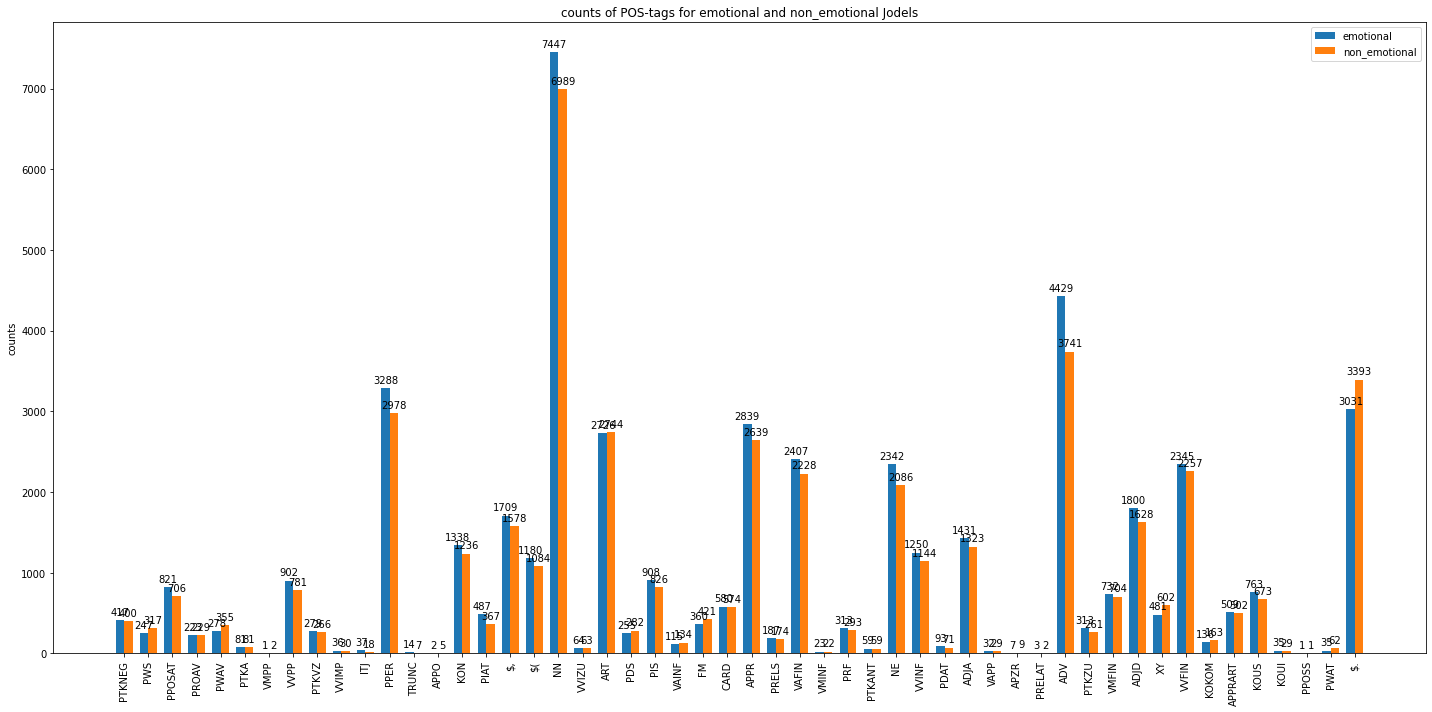

In [29]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = emoji_tags
emotional = emoj_count_emot
non_emotional = emoj_count_non_emot

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
color = (0.2, 0.4)
#plt.figure(figsize=(30,50))
fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, emotional, width, label='emotional')
rects2 = ax.bar(x + width/2, non_emotional, width, label='non_emotional')
#plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('counts')
ax.set_title('counts of POS-tags for emotional and non_emotional Jodels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig("BIG_EMOJI_postag_distribution.jpg")
#ig.savefig('temp.png', dpi=fig.dpi)


In [40]:
#test hashtag distribution in big emoji data
num_emot = 0
num_non = 0
for post in emoji_emot:
    if "#" in post:
        print(post)
        num_emot +=1
print("############################################")
for post in emoji_non:
    if "#" in post:
        num_non +=1
        print(post)
print(num_emot, "AND", num_non)

Ich habe gerade das Phänomen Namens #motovlog auf YT entdeckt, alter was sind das für eklige Menschen.
Heyo liebe Feierwütigen! ‍️ Wo kann man denn in der schönen Hauptstadt um diese Uhrzeit noch auf Techno feiern gehen? (Außer das Berghain, da kommen wir gerade her) Vielen Dank schon mal im Voraus! #berlinclub
Huste schon seit Wochen, aber habe mich gesträubt zum Arzt zu gehn. Mein Bruder ist Mediziner und hat einfach das Stethoskop mit ins Restaurant genommen, wo wir heute mit unsren Eltern gegessen haben #inderfalle
Wieso kann man eigentlich nicht Zeitungsannoncen für Wingwomen aufgeben? #bemywingwoman
Wer war früher auch emo? #jugendsünde
Hach wäre das lustig wenn bei der nächste Wahl die Spd wieder koalieren müsste weil sonst keine Mehrheiten entstehen #selbstzerstörung
Ich habe 0 Prozent Disziplin und weiß auch gar nicht, wie ich das ändern soll #help
Ich glaube mein Unterbewusstsein hasst mich. Da ist man endlich mit jemandem fertig und denkt nicht mehr an ihn. Da schickt ihn me

In [31]:
##################analytics on small emoji set###########################

In [43]:
%store -r emot_texts
emoj_emot = emot_texts[:len(emot_texts)//2]
emoj_non = emot_texts[len(emot_texts)//2:]

In [44]:
for wtf in emoj_non:
    print(wtf)

Mein Ex will eine Freundschaft mit mir, aber ich will ihn zurück. Kann ich ihn so zurückerobern?
Paris spielt wieder so unfassbar schlecht.
Hat eine Frau Lust heute gemütlich irgendwo ein Bier trinken zu gehen? Bin M34
Wenn du dir zu Weihnachten mal selbst was gönnen willst und dann bemerkst, dass International Shipping von der Firma 20$ kosten. #goodbyechristmaswish #itcantbethatexpensive
Wer geht heute alles ins Schaf?
Bei der Anfrage für ne Bachelorarbeit Lebenslauf mitschicken? Notenauszug auch (ist bei mir ziemlich mieß)? Sonst noch was zu beachten?
hat einer von euch hiv? würde mich gerne mal mit jemandem darüber unterhalten und fragen dazu stellen
HAHOHE!
Gibt es hier Damen, die einem Windelfetisch gegenüber offen sind? Bin 29, 195 cm groß und ein netter Typ.
Geiles Jahr 2019 Ging endlich mal wieder was ab auf der Erde
Weiß wer was passiert falls ich den monat mehr als 80 arbeitstunden habe als student? #jhj
Warum ist Cristiano Ronaldo so unbeliebt in Deutschland
Kennt hier jema

In [45]:
#post length and number of punctuation of emotional posts
emoj_post_length = []
emoj_number_of_punct = []
sent_length = []
tokenized_posts
emoj_counter = 0
for post in emoj_emot:
    emoj_post_length.append(len(post.split()))
    sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts.append(tokenize.sent_tokenize(post))
    for i in post:
        if i in string.punctuation:
            emoj_counter+=1
    emoj_number_of_punct.append(emoj_counter)
    emoj_counter = 0

sentence_legths = []
for post in tokenized_posts:
    for sentence in post:
        sentence_legths.append(len(sentence.split()))
        
#post length and number of punctuation of non-emotional posts
emoj_counter_ = 0
emoj_non_emot_post_length = []
emoj_non_emot_number_of_punct = []
non_sent_lenght = []
tokenized_posts_not = []
for post in emoj_non:
    emoj_non_emot_post_length.append(len(post.split()))
    non_sent_lenght.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts_not.append(tokenize.sent_tokenize(post))
    for i in post:
        if i in string.punctuation:
            emoj_counter_+=1
    emoj_non_emot_number_of_punct.append(emoj_counter_)
    emoj_counter_ = 0
    
sentence_legths_not = []
for post in tokenized_posts_not:
    for sentence in post:
        sentence_legths_not.append(len(sentence.split()))
    
print("ANALYTICS ON SMALL EMOJI DATA")    
print("average post_legth of emotional posts: ", sum(emoj_post_length) / len(emoj_post_length))
print("average post_legth of non_emotional posts: ", sum(emoj_non_emot_post_length) / len(emoj_non_emot_post_length))
print("average number of punctuation of emotional posts: ", sum(emoj_number_of_punct) / len(emoj_number_of_punct))
print("average number of punctuation of non_emotional posts: ", sum(emoj_non_emot_number_of_punct) / len(emoj_non_emot_number_of_punct))
print("average number of sentences per emotional post: ", sum(sent_length)/len(sent_length))
print("average number of sentences per non_emotional post: ", sum(non_sent_lenght)/len(non_sent_lenght))
print("average sentence length of emotional posts ", sum(sentence_legths)/len(sentence_legths)) 
print("average sentence length of non_emotional posts ", sum(sentence_legths_not)/len(sentence_legths_not)) 
#print("average number of specially emotional emojis in emotional posts: ", sum(hash_emot_num_emoji) / len(hash_emot_num_emoji))
#print("average number of specially emotional emojis in NON-emotional posts: ", sum(hash_not_emot_num_emoji) / len(hash_not_emot_num_emoji))

ANALYTICS ON SMALL EMOJI DATA
average post_legth of emotional posts:  18.07255520504732
average post_legth of non_emotional posts:  16.163779527559054
average number of punctuation of emotional posts:  2.7917981072555205
average number of punctuation of non_emotional posts:  2.9480314960629923
average number of sentences per emotional post:  1.638801261829653
average number of sentences per non_emotional post:  1.725984251968504
average sentence length of emotional posts  10.649340199549405
average sentence length of non_emotional posts  9.377737226277372


In [46]:
#pos tags emoj

#emot
emoj_emotional_spacy = []
emoj_pos_tag_emot = []
for post in emoj_emot:
    emoj_emotional_spacy.append(nlp(post))

for post in emoj_emotional_spacy:
    for token in post:
        emoj_pos_tag_emot.append(token.tag_)
        #print(token, token.tag_, token.pos_)
#not emot        
non_emoj_emotional_spacy = []
non_emoj_pos_tag_emot = []
for post in emoj_non:
    non_emoj_emotional_spacy.append(nlp(post))

for post in non_emoj_emotional_spacy:
    for token in post:
        non_emoj_pos_tag_emot.append(token.tag_)
        print(token, token.tag_, token.pos_)
        
        
#sort lists
emoj_sorted_emot_tags = sorted(emoj_pos_tag_emot)
emoj_sorted_non_emot_tags = sorted(non_emoj_pos_tag_emot)

emoj_pos_tags = []
emoj_counts = []
from collections import Counter
for key, val in Counter(emoj_sorted_emot_tags).items():
    emoj_pos_tags.append(key)
    emoj_counts.append(val)
    
emoj_nonemot_pos_tags = []
emoj_nonemot_counts = []
for key, val in Counter(emoj_sorted_non_emot_tags).items():
    emoj_nonemot_pos_tags.append(key)
    emoj_nonemot_counts.append(val)
    
#get all counts, also 0-counts
#create list with all postags
emoj_all_tags = list(set(emoj_nonemot_pos_tags+emoj_pos_tags))

#counts all in emotional data
emoj_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_emot_counts_and_tags.append((tag, emoj_pos_tag_emot.count(tag)))
    
#count all pos tags in non_emotional data
emoj_non_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_non_emot_counts_and_tags.append((tag, non_emoj_pos_tag_emot.count(tag)))
#print("NOT EMOTIONAL")
#print(emoj_non_emot_counts_and_tags)
#print("EMOTIONAL")
#print(emoj_emot_counts_and_tags)

#get lists for plotting
emoji_tags = []
emoj_count_emot = []
emoj_count_non_emot = []
for tup in emoj_emot_counts_and_tags:
    emoji_tags.append(tup[0])
    emoj_count_emot.append(tup[1])
for tup in emoj_non_emot_counts_and_tags:
    emoj_count_non_emot.append(tup[1])
print(emoji_tags)

Mein PPOSAT DET
Ex NN NOUN
will VMFIN VERB
eine ART DET
Freundschaft NN NOUN
mit APPR ADP
mir PPER PRON
, $, PUNCT
aber KON CCONJ
ich PPER PRON
will VMFIN VERB
ihn PPER PRON
zurück PTKVZ ADP
. $. PUNCT
Kann VMFIN VERB
ich PPER PRON
ihn PPER PRON
so ADV ADV
zurückerobern VVINF VERB
? $. PUNCT
Paris NE PROPN
spielt VVFIN VERB
wieder ADV ADV
so ADV ADV
unfassbar ADJD ADJ
schlecht ADJD ADJ
. $. PUNCT
Hat VAFIN AUX
eine ART DET
Frau NN NOUN
Lust NN NOUN
heute ADV ADV
gemütlich ADJD ADJ
irgendwo ADV ADV
ein ART DET
Bier NN NOUN
trinken VVINF VERB
zu PTKZU PART
gehen VVINF VERB
? $. PUNCT
Bin VAFIN AUX
M34 NN NOUN
Wenn KOUS SCONJ
du PPER PRON
dir PPER PRON
zu APPR ADP
Weihnachten NN NOUN
mal ADV ADV
selbst ADV ADV
was PIS PRON
gönnen VVINF VERB
willst VMFIN VERB
und KON CCONJ
dann ADV ADV
bemerkst VVFIN VERB
, $, PUNCT
dass KOUS SCONJ
International NE PROPN
Shipping NE PROPN
von APPR ADP
der ART DET
Firma NN NOUN
20 CARD NUM
$ NN NOUN
kosten VVINF VERB
. $. PUNCT
# XY X
goodbyechristmaswish N

als APPR ADP
einziger PIS PRON
meldet VVFIN VERB
... $( PUNCT
# $. PUNCT
suckstobetheonewhocaresmore NE PROPN
Was PWS PRON
ihr PPER PRON
sicher ADJD ADJ
noch ADV ADV
nicht PTKNEG PART
wusstet VVFIN VERB
: $. PUNCT
Die ART DET
Redensart NN NOUN
„ $( PUNCT
Dumm ADJD ADJ
wie KOKOM CCONJ
Brod NN NOUN
“ $( PUNCT
bezieht VVFIN VERB
sich PRF PRON
auf APPR ADP
Kafkas NE PROPN
Nachlassverwalter NN NOUN
Max NE PROPN
Brod NE PROPN
, $, PUNCT
der PRELS PRON
die ART DET
idiotische ADJA ADJ
Idee NN NOUN
hatte VAFIN AUX
Kafkas NE PROPN
Romane NE PROPN
nicht PTKNEG PART
sofort ADV ADV
wegzuschmeißen VVINF VERB
, $, PUNCT
sondern KON CCONJ
auch ADV ADV
noch ADV ADV
zu PTKZU PART
veröffentlichen VVINF VERB
. $. PUNCT
Ich PPER PRON
brauche VVFIN VERB
nicht PTKNEG PART
deine PPOSAT DET
Glückwünsche NN NOUN
, $, PUNCT
sondern KON CCONJ
nur ADV ADV
dich PRF PRON
! $. PUNCT
# $( PUNCT
abererwillnicht VVPP VERB
Was PWS PRON
macht VVFIN VERB
ihr PPER PRON
wenn KOUS SCONJ
ihr PPER PRON
einen ART DET
choleriker 

oder KON CCONJ
nicht PTKNEG PART
# $. PUNCT
gehörenerinerrungenindenbiolmüll NE PROPN
? $. PUNCT
Wie PWAV ADV
größenwahnsinnig ADJD ADJ
ist VAFIN AUX
es PPER PRON
bitte ADV ADV
dass KOUS SCONJ
Hertha NE PROPN
offiziell ADJD ADJ
von APPR ADP
CL NE PROPN
und KON CCONJ
Titeln NN NOUN
in APPR ADP
der ART DET
Zukunft NN NOUN
redet VVFIN VERB
? $. PUNCT
Ich PPER PRON
habe VAFIN AUX
mir PRF PRON
sagen VVINF VERB
lassen VVINF VERB
, $, PUNCT
dass KOUS SCONJ
man PIS PRON
auf APPR ADP
Jodel NN NOUN
hübsche ADJA ADJ
Mädchen NN NOUN
kennenlernen VVINF VERB
kann VMFIN VERB
. $. PUNCT
Ich PPER PRON
persönlich ADJD ADJ
halte VVFIN VERB
das PDS PRON
für APPR ADP
ein ART DET
Gerücht NN NOUN
Ich PPER PRON
bin VAFIN AUX
30 CARD NUM
Jahre NN NOUN
alt ADJD ADJ
, $, PUNCT
übergewichtig ADJD ADJ
, $, PUNCT
dafür PROAV ADV
aber ADV ADV
vermögend ADJD ADJ
. $. PUNCT
Gleicht VVFIN VERB
sich PRF PRON
das PDS PRON
in APPR ADP
den ART DET
Augen NN NOUN
von APPR ADP
Frauen NN NOUN
aus PTKVZ ADP
? $. PUNCT
Please FM

vorstellen VVINF VERB
kann VMFIN VERB
. $. PUNCT
Habe VAFIN AUX
eine ART DET
getroffen VVPP VERB
, $, PUNCT
in APPR ADP
die PRELS PRON
ich PPER PRON
mich PRF PRON
ein ART DET
wenig PIS PRON
verguckt VVPP VERB
habe VAFIN AUX
. $. PUNCT
Ist VAFIN AUX
es PPER PRON
legitim ADJD ADJ
die ART DET
Fühler NN NOUN
auszustrecken VVIZU VERB
und KON CCONJ
sie PPER PRON
besser ADJD ADJ
kennenzulernen VVIZU VERB
? $. PUNCT
Mit APPR ADP
welchem PWAT DET
Gehalt NN NOUN
kann VMFIN VERB
man PIS PRON
als APPR ADP
Doktorand NN NOUN
im APPRART ADP
Ingenieurswesen NN NOUN
so ADV ADV
rechnen VVINF VERB
? $. PUNCT
Open NE PROPN
this NE PROPN
Gate NE PROPN
Suche ADJA ADJ
Silvestersex NE PROPN
mit APPR ADP
einer ART DET
reifen ADJA ADJ
Frau NN NOUN
. $. PUNCT
Dominant ADJD ADJ
, $, PUNCT
m27 NN NOUN
Mensa NE PROPN
is FM X
elit FM X
geworden VAPP AUX
Geht VVFIN VERB
ne ART DET
Frau NN NOUN
zum APPRART ADP
Arzt NN NOUN
: $. PUNCT
" $( PUNCT
Herr NN NOUN
Doktor NN NOUN
, $, PUNCT
ich PPER PRON
habe VAFIN AUX
einen 

: $. PUNCT
Das ART DET
Interesse NN NOUN
an APPR ADP
Politik NN NOUN
ist VAFIN AUX
so ADV ADV
groß ADJD ADJ
wie KOKOM CCONJ
schon ADV ADV
lange ADV ADV
nicht PTKNEG PART
mehr ADV ADV
. $. PUNCT
Vor APPR ADP
allem PIS PRON
bei APPR ADP
jungen ADJA ADJ
Men NE PROPN
Perisic NN NOUN
, $, PUNCT
wieso PWAV ADV
kannst VMFIN VERB
du PPER PRON
den PDS PRON
nicht PTKNEG PART
hart ADJD ADJ
reinspielen VVIZU VERB
„ $( PUNCT
Jeder PIAT DET
Mensch NN NOUN
hat VAFIN AUX
mindestens ADV ADV
5 CARD NUM
Stunden NN NOUN
Freizeit NN NOUN
am APPRART ADP
Tag NN NOUN
. $. PUNCT
Wenn KOUS SCONJ
er PPER PRON
8 CARD NUM
Stunden NN NOUN
arbeitet VVFIN VERB
und KON CCONJ
8 CARD NUM
Stunden NN NOUN
schläft VVFIN VERB
. $. PUNCT
“ $( PUNCT
Ich PPER PRON
für APPR ADP
meinen PPOSAT DET
Teil NN NOUN
stehe VVFIN VERB
morgens ADV ADV
um APPR ADP
4 CARD NUM
Uhr NN NOUN
auf PTKVZ ADP
, $, PUNCT
kümmere VVFIN VERB
mich PPER PRON
um APPR ADP
meine PPOSAT DET
Kinder NN NOUN
, $, PUNCT
gehe VVIMP VERB
duschen VVFIN VERB
, $, P

und KON CCONJ
Weise NN NOUN
. $. PUNCT
Bitte ADV ADV
helft VVFIN VERB
mir PPER PRON
sie PPER PRON
zurückzuerobern VVIZU VERB
. $. PUNCT
Welcher PWAT DET
elende ADJA ADJ
, $, PUNCT
gefühlsresistente ADJA ADJ
HUEN NE PROPN
hat VAFIN AUX
meine PPOSAT DET
Jacke NN NOUN
im APPRART ADP
Clubhaus NN NOUN
gestohlen VVPP VERB
? $. PUNCT
Seit APPR ADP
meiner PPOSAT DET
Kündigung NN NOUN
trinke VVFIN VERB
ich PPER PRON
etwa ADV ADV
pro APPR ADP
Woche NN NOUN
2 CARD NUM
Kästen NN NOUN
, $, PUNCT
schaffe VVFIN VERB
nichts PIS PRON
mehr ADV ADV
zu APPR ADP
Hause NN NOUN
und KON CCONJ
bewege VVFIN VERB
mich PPER PRON
fast ADV ADV
nicht PTKNEG PART
mehr ADV ADV
raus PTKVZ ADP
. $. PUNCT
Das PDS PRON
ist VAFIN AUX
etwa ADV ADV
4 CARD NUM
- $( PUNCT
5 CARD NUM
Wochen NN NOUN
her APZR ADP
... $( PUNCT
Wie PWAV ADV
finde VVFIN VERB
ich PPER PRON
den ART DET
Silberstreif NN NOUN
am APPRART ADP
Horizont NN NOUN
? $. PUNCT
Ich PPER PRON
bin VAFIN AUX
dafür PROAV ADV
, $, PUNCT
dass KOUS SCONJ
Frauen NN NOUN
i

er PPER PRON
stumm ADJD ADJ
geswitcht VVPP VERB
, $, PUNCT
Wissen NN NOUN
schützt VVFIN VERB
vor APPR ADP
Dummheit NN NOUN
nicht PTKNEG PART
" $( PUNCT
Hab VAFIN AUX
gerade ADV ADV
gelnägel NE PROPN
& KON CCONJ
die PDS PRON
sind VAFIN AUX
echt ADJD ADJ
rausgewachsen ADJD ADJ
.. $. PUNCT
Wisst VVFIN VERB
ihr PPER PRON
wie PWAV ADV
teuer ADJD ADJ
es PPER PRON
ist VAFIN AUX
sich PRF PRON
die ART DET
alten ADJA ADJ
abzumachen VVIZU VERB
um APPR ADP
dann ADV ADV
neue ADJA ADJ
drauf NN NOUN
zu PTKZU PART
Bekommen VVINF VERB
? $. PUNCT
Eure PPOSAT DET
Meinung NN NOUN
zu APPR ADP
Menschenhandel NN NOUN
? $. PUNCT
Darf VMFIN VERB
man PIS PRON
als APPR ADP
Mann NN NOUN
in APPR ADP
unserer PPOSAT DET
Zeit NN NOUN
die ART DET
selben ADJA ADJ
Ängste NN NOUN
und KON CCONJ
Gefühle NN NOUN
haben VAFIN AUX
und KON CCONJ
noch ADV ADV
wichtiger ADJD ADJ
zeigen VVINF VERB
wie KOKOM CCONJ
es PPER PRON
eine ART DET
Frau NN NOUN
tut VVFIN VERB
? $. PUNCT
Ich PPER PRON
finde VVFIN VERB
ja ADV ADV
gleichberech

nix PIS PRON
ändert VVFIN VERB
und KON CCONJ
der ART DET
Staat NN NOUN
einfach ADV ADV
nur ADV ADV
einen ART DET
Haufen NN NOUN
Geld NN NOUN
kassiert VVFIN VERB
, $, PUNCT
das PRELS PRON
in APPR ADP
irgendwo ADV ADV
versickert VVPP VERB
Hat VAFIN AUX
das ART DET
Kuckuck NN NOUN
heute ADV ADV
offen ADJD ADJ
? $. PUNCT
# XY X
Tübingen#WHO NN NOUN
Heute ADV ADV
hole VVFIN VERB
ich PPER PRON
5 CARD NUM
Vorlesungen NN NOUN
Statistik NN NOUN
nach PTKVZ ADP
. $. PUNCT
Hab VAFIN AUX
nie ADV ADV
Feuerwerk NN NOUN
gemacht VVPP VERB
. $. PUNCT
Aber KON CCONJ
dieses PDAT DET
Jahr NN NOUN
mache VVFIN VERB
ich PPER PRON
es PPER PRON
aus APPR ADP
Sorge NN NOUN
, $, PUNCT
dass KOUS SCONJ
man PIS PRON
es PPER PRON
wohl ADV ADV
nie ADV ADV
wieder ADV ADV
darf VMFIN VERB
. $. PUNCT
# XY X
8mSicherheitsabstand NN NOUN
Ich PPER PRON
komme VVFIN VERB
nicht PTKNEG PART
klar ADJD ADJ
auf APPR ADP
Leute NN NOUN
, $, PUNCT
die PRELS PRON
deren PDS PRON
Namen NN NOUN
auch ADV ADV
unter APPR ADP
Türken NN NOUN
de

W NE PROPN
, $, PUNCT
die ART DET
Single NN NOUN
geworden VAPP AUX
ist VAFIN AUX
und KON CCONJ
Lust NN NOUN
auf APPR ADP
was PWS PRON
neues NN NOUN
hat VAFIN AUX
? $. PUNCT
Bin VAFIN AUX
M22 NN NOUN
sportlich ADJD ADJ
mag VMFIN VERB
aber ADV ADV
Essen NE PROPN
aller PIAT DET
Art NN NOUN
und KON CCONJ
bin VAFIN AUX
musikalisch ADJD ADJ
. $. PUNCT
Wenn KOUS SCONJ
eine ART DET
w XY X
Lust NN NOUN
hat VAFIN AUX
sich PRF PRON
auf APPR ADP
einen ART DET
so ADV ADV
tollen ADJA ADJ
Typen NN NOUN
einzulassen VVIZU VERB
, $, PUNCT
dann ADV ADV
melde VVFIN VERB
dich PRF PRON
... $( PUNCT
Woran PROAV ADV
habt VAFIN AUX
ihr PPER PRON
gemerkt VVPP VERB
dass KOUS SCONJ
die ART DET
Beziehung NN NOUN
keinen PIAT DET
Sinn NN NOUN
mehr ADV ADV
macht VVFIN VERB
? $. PUNCT
# $( PUNCT
traurigeweihnachten VVFIN VERB
Kriminelle NN NOUN
Ausländer NN NOUN
raus ADV ADV
raus ADV ADV
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
raus FM X
ra

mich PPER PRON
langweilig ADJD ADJ
Interessant ADJD ADJ
dieses PDAT DET
Phänomen NN NOUN
auf APPR ADP
Jodel NN NOUN
, $, PUNCT
immer ADV ADV
unbedingt ADJD ADJ
dem ART DET
OJ NE PROPN
widersprechen VVINF VERB
zu PTKZU PART
müssen VMINF VERB
... $( PUNCT
Was PWS PRON
sind VAFIN AUX
eure PPOSAT DET
liebsten ADJA ADJ
Rezepte NN NOUN
? $. PUNCT
:) $( PUNCT
Was PWS PRON
sind VAFIN AUX
so ADV ADV
eure PPOSAT DET
liebsten ADJA ADJ
2nd-hand-Läden NN NOUN
? $. PUNCT
:) XY X
( $( PUNCT
optimal ADJD ADJ
welche PWS PRON
die ART DET
man PIS PRON
als APPR ADP
Student NN NOUN
auch ADV ADV
bezahlen VVINF VERB
kann VMFIN VERB
) $( PUNCT
Eine ART DET
w PPOSAT DET
die ART DET
Lust NN NOUN
auf APPR ADP
hotelsex NN NOUN
heute ADV ADV
Nacht NN NOUN
hat VAFIN AUX
? $. PUNCT
M23 XY X
Wenn KOUS SCONJ
die ART DET
Vorlesung NN NOUN
freitags ADV ADV
um APPR ADP
8:00 CARD NUM
nichtmal ADV ADV
ct NN NOUN
ist VAFIN AUX
... $( PUNCT
# $. PUNCT
fuckST $( PUNCT
Kann VMFIN VERB
ich PPER PRON
im APPRART ADP
dm NN NOUN
am

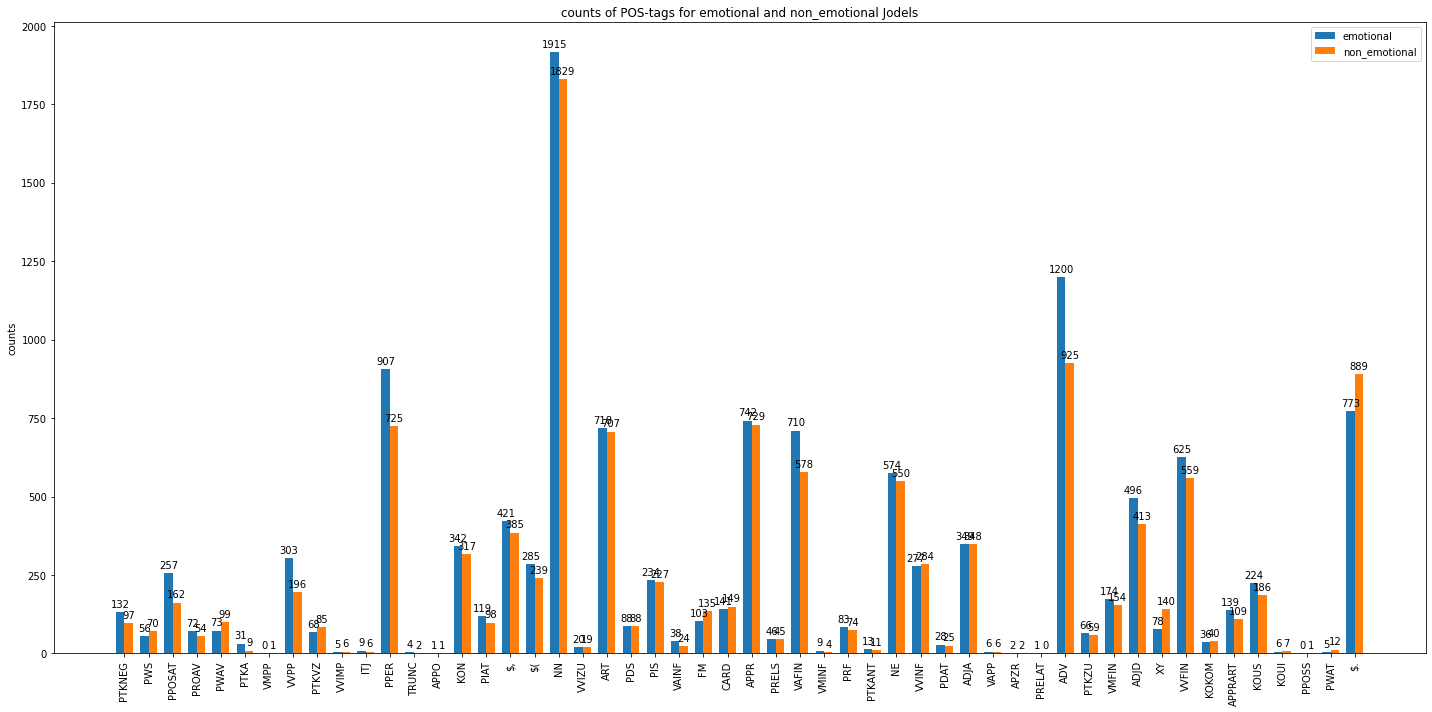

In [47]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = emoji_tags
emotional = emoj_count_emot
non_emotional = emoj_count_non_emot

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
color = (0.2, 0.4)
#plt.figure(figsize=(30,50))
fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, emotional, width, label='emotional')
rects2 = ax.bar(x + width/2, non_emotional, width, label='non_emotional')
#plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('counts')
ax.set_title('counts of POS-tags for emotional and non_emotional Jodels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig("SMALL_EMOJI_postag_distribution.jpg")
#ig.savefig('temp.png', dpi=fig.dpi)


In [49]:
#test hashtag distribution in handannotated data
num_emo = 0
num_non_emo = 0
for post in emoj_emot:
    if "#" in post:
        print(post)
        num_emo +=1
print("############################################")
for post in emoj_non:
    if "#" in post:
        num_non_emo +=1
        print(post)
print(num_emo, "AND", num_non_emo)

Ich habe gerade das Phänomen Namens #motovlog auf YT entdeckt, alter was sind das für eklige Menschen.
Huste schon seit Wochen, aber habe mich gesträubt zum Arzt zu gehn. Mein Bruder ist Mediziner und hat einfach das Stethoskop mit ins Restaurant genommen, wo wir heute mit unsren Eltern gegessen haben #inderfalle
Hach wäre das lustig wenn bei der nächste Wahl die Spd wieder koalieren müsste weil sonst keine Mehrheiten entstehen #selbstzerstörung
Mein Freund hat sich gerade 2 Stunden lang die Seele aus dem Leib gekotzt. Kam ganz plötzlich. Mit Schüttelfrost und Co. Jetzt liegt er neben mir und ich mache mir Sorgen #hoffentlichistesmorgenbesser # #armerschatz
Ich hab gleich ein Bewerbungsgespräch und gerade ne Blasenentzündung bekommen was hilft jetzt sofort?? Hab schon ne ibu genommen und was pflanzliches.. #hilfe
Oh Mann, sorry für das mimimi aber ich bin gerade so hoffnungslos. Mein Freund und ich haben uns vor kurzem getrennt und ich komm einfach nicht drauf klar, ich denke ich werde

In [147]:
############analytics on jhj/emoji set############

%store -r tuples_jhj_emoji
jhj_emoji = []
not_jhj_emoji = []
for tupl in tuples_jhj_emoji:
    if tupl[1] == 1:
        jhj_emoji.append(tupl[0])
    else:
        not_jhj_emoji.append(tupl[0])
jhj_emoji = jhj_emoji[:228]

In [148]:
#clean data from #jhj and emotional emojis

#remove emotional emojis
clean_texts = []
clean_post = ""
for post in jhj_emoji:
    for c in post:
        if c not in emojis:
            clean_post += c
    clean_texts.append(" ".join(clean_post.split())) #remove redundant white space
    clean_post = ""
jhj_emoji = clean_texts

clean_texts = []
clean_post = ""
for post in not_jhj_emoji:
    for c in post:
        if c not in emojis:
            clean_post += c
    clean_texts.append(" ".join(clean_post.split())) #remove redundant white space
    clean_post = ""
not_jhj_emoji = clean_texts

#remove #jhj
hash_clean = []
post_without = []
for post in jhj_emoji:
    for word in post.split(" "):
        if not word.startswith("#"):
            post_without.append(word)
    hash_clean.append(" ".join((" ".join(post_without)).split())) #remove redundant white space
    post_without = []
jhj_emoji = hash_clean

hash_clean = []
post_without = []
for post in not_jhj_emoji:
    for word in post.split(" "):
        if not word.startswith("#"):
            post_without.append(word)
    hash_clean.append(" ".join((" ".join(post_without)).split())) #remove redundant white space
    post_without = []
not_jhj_emoji = hash_clean
not_jhj_emoji

['Hat hier jemand Erfahrungen mit Atlantotec und würde mir für ein paar Frageb zur Verfügung stehen?',
 'Wie viele Plätze gibt es für den Wirtschaftsrecht Master?',
 'Welche ähnlichen vorzugsweise europäischen Online-Shops, die eine auch eine gute Auswahl an Holo-Nagellacken haben kennt ihr denn noch? Hypnoticpolish macht ja leider gerade Winterpause.',
 'Hat die UB zwischen Weihnachten und Silvester offen?',
 'Hat jemand Zusammenfassungen von Makro und hat lust sie zu schicken?',
 'Wo kann man hier heute el clásico sehen?',
 'Ich will nicht seltsam klingen, aber gibt es irgendeine Art Seminar, bei dem ich zu mir selbst finden kann? Bei dem ich meine Stärken erkenne und wertschätzen lerne? Irgendwie übernimmt meine Selbstkritik die Kontrolle über mein Leben',
 'Sind hier auch Betroffene? Reizdarm, MC ? Austausch wäre cool',
 'Bei mir im Kurs ist ein Mädel, das ich (w) echt nett finde. Sie lächelt mich auch oft an und manchmal quatschen wir ein bisschen. Wie kann ich sie als Freundin ge

In [149]:
#post length and number of punctuation of emotional posts
emoj_post_length = []
emoj_number_of_punct = []
emoji_sent_length = []
tokenized_posts = []
emoj_counter = 0
for post in jhj_emoji:
    emoj_post_length.append(len(post.split()))
    emoji_sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts.append(tokenize.sent_tokenize(post))
    for i in post:
        if i in string.punctuation:
            emoj_counter+=1
    emoj_number_of_punct.append(emoj_counter)
    emoj_counter = 0

sentence_legths = []
for post in tokenized_posts:
    for sentence in post:
        sentence_legths.append(len(sentence.split()))
        
#post length and number of punctuation of non-emotional posts
emoj_counter_ = 0
emoj_non_emot_post_length = []
emoj_non_emot_number_of_punct = []
emoji_non_sent_length = []
tokenized_posts_not = []
for post in not_jhj_emoji:
    emoj_non_emot_post_length.append(len(post.split()))
    emoji_non_sent_length.append(len(tokenize.sent_tokenize(post)))
    tokenized_posts_not.append(tokenize.sent_tokenize(post))
    for i in post:
        if i in string.punctuation:
            emoj_counter_+=1
    emoj_non_emot_number_of_punct.append(emoj_counter_)
    emoj_counter_ = 0
    
sentence_legths_not = []
for post in tokenized_posts_not:
    for sentence in post:
        sentence_legths_not.append(len(sentence.split()))    
print("ANALYTICS ON jhj and small emoji data")    
print("average post_legth of emotional posts: ", sum(emoj_post_length) / len(emoj_post_length))
print("average post_legth of non_emotional posts: ", sum(emoj_non_emot_post_length) / len(emoj_non_emot_post_length))
print("average number of punctuation of emotional posts: ", sum(emoj_number_of_punct) / len(emoj_number_of_punct))
print("average number of punctuation of non_emotional posts: ", sum(emoj_non_emot_number_of_punct) / len(emoj_non_emot_number_of_punct))
print("average number of sentences per emotional post: ", sum(emoji_sent_length)/len(emoji_sent_length))
print("average number of sentences per non_emotional post: ", sum(emoji_non_sent_length)/len(emoji_non_sent_length))
print("average sentence length of emotional posts ", sum(sentence_legths)/len(sentence_legths)) 
print("average sentence length of non_emotional posts ", sum(sentence_legths_not)/len(sentence_legths_not))
#print("average number of specially emotional emojis in emotional posts: ", sum(hash_emot_num_emoji) / len(hash_emot_num_emoji))
#print("average number of specially emotional emojis in NON-emotional posts: ", sum(hash_not_emot_num_emoji) / len(hash_not_emot_num_emoji))

ANALYTICS ON jhj and small emoji data
average post_legth of emotional posts:  18.56140350877193
average post_legth of non_emotional posts:  17.013157894736842
average number of punctuation of emotional posts:  2.539473684210526
average number of punctuation of non_emotional posts:  2.93859649122807
average number of sentences per emotional post:  1.6491228070175439
average number of sentences per non_emotional post:  1.7850877192982457
average sentence length of emotional posts  11.26063829787234
average sentence length of non_emotional posts  9.535626535626536


In [150]:
#pos tags emoj

#emot
emoj_emotional_spacy = []
emoj_pos_tag_emot = []
for post in jhj_emoji:
    emoj_emotional_spacy.append(nlp(post))
    #print(type(nlp(post)))

for post in emoj_emotional_spacy:
    for token in post:
        emoj_pos_tag_emot.append(token.tag_)
        #print(token, token.tag_, token.pos_)
#not emot        
non_emoj_emotional_spacy = []
non_emoj_pos_tag_emot = []
for post in not_jhj_emoji:
    non_emoj_emotional_spacy.append(nlp(post))

for post in non_emoj_emotional_spacy:
    for token in post:
        non_emoj_pos_tag_emot.append(token.tag_)
        print(token, token.tag_, token.pos_)
        
        
#sort lists
emoj_sorted_emot_tags = sorted(emoj_pos_tag_emot)
emoj_sorted_non_emot_tags = sorted(non_emoj_pos_tag_emot)

emoj_pos_tags = []
emoj_counts = []
from collections import Counter
for key, val in Counter(emoj_sorted_emot_tags).items():
    emoj_pos_tags.append(key)
    emoj_counts.append(val)
    
emoj_nonemot_pos_tags = []
emoj_nonemot_counts = []
for key, val in Counter(emoj_sorted_non_emot_tags).items():
    emoj_nonemot_pos_tags.append(key)
    emoj_nonemot_counts.append(val)
    
#get all counts, also 0-counts
#create list with all postags
emoj_all_tags = list(set(emoj_nonemot_pos_tags+emoj_pos_tags))

#counts all in emotional data
emoj_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_emot_counts_and_tags.append((tag, emoj_pos_tag_emot.count(tag)))
    
#count all pos tags in non_emotional data
emoj_non_emot_counts_and_tags = []
for tag in emoj_all_tags:
    emoj_non_emot_counts_and_tags.append((tag, non_emoj_pos_tag_emot.count(tag)))
#print("NOT EMOTIONAL")
#print(emoj_non_emot_counts_and_tags)
#print("EMOTIONAL")
#print(emoj_emot_counts_and_tags)

#get lists for plotting
emoji_tags = []
emoj_count_emot = []
emoj_count_non_emot = []
for tup in emoj_emot_counts_and_tags:
    emoji_tags.append(tup[0])
    emoj_count_emot.append(tup[1])
for tup in emoj_non_emot_counts_and_tags:
    emoj_count_non_emot.append(tup[1])
print(emoji_tags)

Hat VAFIN AUX
hier ADV ADV
jemand PIS PRON
Erfahrungen NN NOUN
mit APPR ADP
Atlantotec NE PROPN
und KON CCONJ
würde VAFIN AUX
mir PPER PRON
für APPR ADP
ein ART DET
paar PIAT DET
Frageb NN NOUN
zur APPRART ADP
Verfügung NN NOUN
stehen VVINF VERB
? $. PUNCT
Wie PWAV ADV
viele PIAT DET
Plätze NN NOUN
gibt VVFIN VERB
es PPER PRON
für APPR ADP
den ART DET
Wirtschaftsrecht NN NOUN
Master NN NOUN
? $. PUNCT
Welche PWAT DET
ähnlichen ADJA ADJ
vorzugsweise ADJD ADJ
europäischen ADJA ADJ
Online-Shops NN NOUN
, $, PUNCT
die PRELS PRON
eine ART DET
auch ADV ADV
eine ART DET
gute ADJA ADJ
Auswahl NN NOUN
an APPR ADP
Holo-Nagellacken NN NOUN
haben VAFIN AUX
kennt VVFIN VERB
ihr PPER PRON
denn ADV ADV
noch ADV ADV
? $. PUNCT
Hypnoticpolish ADJD ADJ
macht VVFIN VERB
ja ADV ADV
leider ADV ADV
gerade ADV ADV
Winterpause NN NOUN
. $. PUNCT
Hat VAFIN AUX
die ART DET
UB NE PROPN
zwischen APPR ADP
Weihnachten NN NOUN
und KON CCONJ
Silvester NN NOUN
offen PTKVZ ADP
? $. PUNCT
Hat VAFIN AUX
jemand PIAT DET
Z

Rat NN NOUN
geben VVINF VERB
? $. PUNCT
Ich PPER PRON
habe VAFIN AUX
leichte ADJA ADJ
" $( PUNCT
social FM X
anxiety FM X
" $( PUNCT
( $( PUNCT
keine PIAT DET
Ahnung NN NOUN
wie KOKOM CCONJ
das PDS PRON
auf APPR ADP
Deutsch NN NOUN
heißt VVFIN VERB
) $( PUNCT
und KON CCONJ
bin VAFIN AUX
in APPR ADP
einem ART DET
kleinen ADJA ADJ
Dilemma NN NOUN
was PWS PRON
meine PPOSAT DET
Pläne NN NOUN
heute ADV ADV
Abend NN NOUN
betrifft VVFIN VERB
, $, PUNCT
das PRELS PRON
mich PPER PRON
ein ART DET
bisschen PIS PRON
hibbelig ADJD ADJ
macht VVFIN VERB
... $( PUNCT
Morgen ADV ADV
kommt VVFIN VERB
mich PPER PRON
eine ART DET
Freundin NN NOUN
besuchen VVINF VERB
, $, PUNCT
die ART DET
Zöliakie NN NOUN
hat VAFIN AUX
. $. PUNCT
Kann VMFIN VERB
jemand PIAT DET
gute ADJA ADJ
Restaurants NN NOUN
empfehlen VVINF VERB
, $, PUNCT
die PRELS PRON
darauf PROAV ADV
Rücksicht NN NOUN
nehmen VVINF VERB
? $. PUNCT
welchen PWAT DET
namen NN NOUN
soll VMFIN VERB
ich PPER PRON
meinem PPOSAT DET
WLAN NN NOUN
geben VVINF

gekauft VVPP VERB
. $. PUNCT
Kann VMFIN VERB
wer PWS PRON
von APPR ADP
euch PPER PRON
gegen APPR ADP
ein ART DET
Taschengeld NN NOUN
die ART DET
Bindung NN NOUN
einstellen VVINF VERB
? $. PUNCT
Ich PPER PRON
würde VAFIN AUX
mich PRF PRON
sehr ADV ADV
freuen VVINF VERB
Wird VAFIN AUX
ein ART DET
Eigenreflex NN NOUN
( $( PUNCT
Achillessehne NN NOUN
) $( PUNCT
bzw. KON CCONJ
Die ART DET
muskelantwort NN NOUN
stärker ADJD ADJ
, $, PUNCT
wenn KOUS SCONJ
man PIS PRON
stärker ADJD ADJ
draufschlägt VVFIN VERB
? $. PUNCT
Wo PWAV ADV
kann VMFIN VERB
ich PPER PRON
mir PPER PRON
hier ADV ADV
meine PPOSAT DET
Nippel NN NOUN
piercen VVINF VERB
lassen VVINF VERB
und KON CCONJ
was PWS PRON
kostet VVFIN VERB
das PDS PRON
so ADV ADV
? $. PUNCT
😊 $( PUNCT
Weiß VVFIN VERB
jemand PIS PRON
Zimmerpflanzen NN NOUN
, $, PUNCT
die PRELS PRON
auch ADV ADV
in APPR ADP
dunklen ADJA ADJ
Ecken NN NOUN
überleben VVINF VERB
? $. PUNCT
Weiß VVFIN VERB
jemand PIS PRON
ob KOUS SCONJ
die ART DET
Southside NN NOUN
Tickets 

. $. PUNCT
Kann VMFIN VERB
ich PPER PRON
einen PIS PRON
davon PROAV ADV
nehmen VVINF VERB
? $. PUNCT
Müsste VMFIN VERB
heute ADV ADV
anfangen VVINF VERB
? $. PUNCT
Hat VAFIN AUX
jemand PIAT DET
Erfahrung NN NOUN
mit APPR ADP
vitasprint NE PROPN
und KON CCONJ
weiß VVFIN VERB
ob KOUS SCONJ
man PIS PRON
dann ADV ADV
besser ADJD ADJ
lernen VVINF VERB
kann VMFIN VERB
? $. PUNCT
🙈 $( PUNCT
Wie PWAV ADV
ist VAFIN AUX
man PIS PRON
als APPR ADP
M NE PROPN
romantisch ADJD ADJ
? $. PUNCT
Welche PWS PRON
ist VAFIN AUX
die ART DET
bessere ADJA ADJ
Therme NN NOUN
- $( PUNCT
Bad NE PROPN
Urach NE PROPN
oder KON CCONJ
Beuten NN NOUN
? $. PUNCT
Ich PPER PRON
habe VAFIN AUX
keine PIAT DET
Ahnung NN NOUN
von APPR ADP
Lose NN NOUN
oder KON CCONJ
Lotto NN NOUN
. $. PUNCT
Zum APPRART ADP
Neujahr NN NOUN
würde VAFIN AUX
ich PPER PRON
aber ADV ADV
gerne ADV ADV
eins PIS PRON
verschenken VVINF VERB
. $. PUNCT
Was PWS PRON
wäre VAFIN AUX
denn ADV ADV
sinnvoll ADJD ADJ
? $. PUNCT
Einfach ADJD ADJ
ein ART DET
Lot

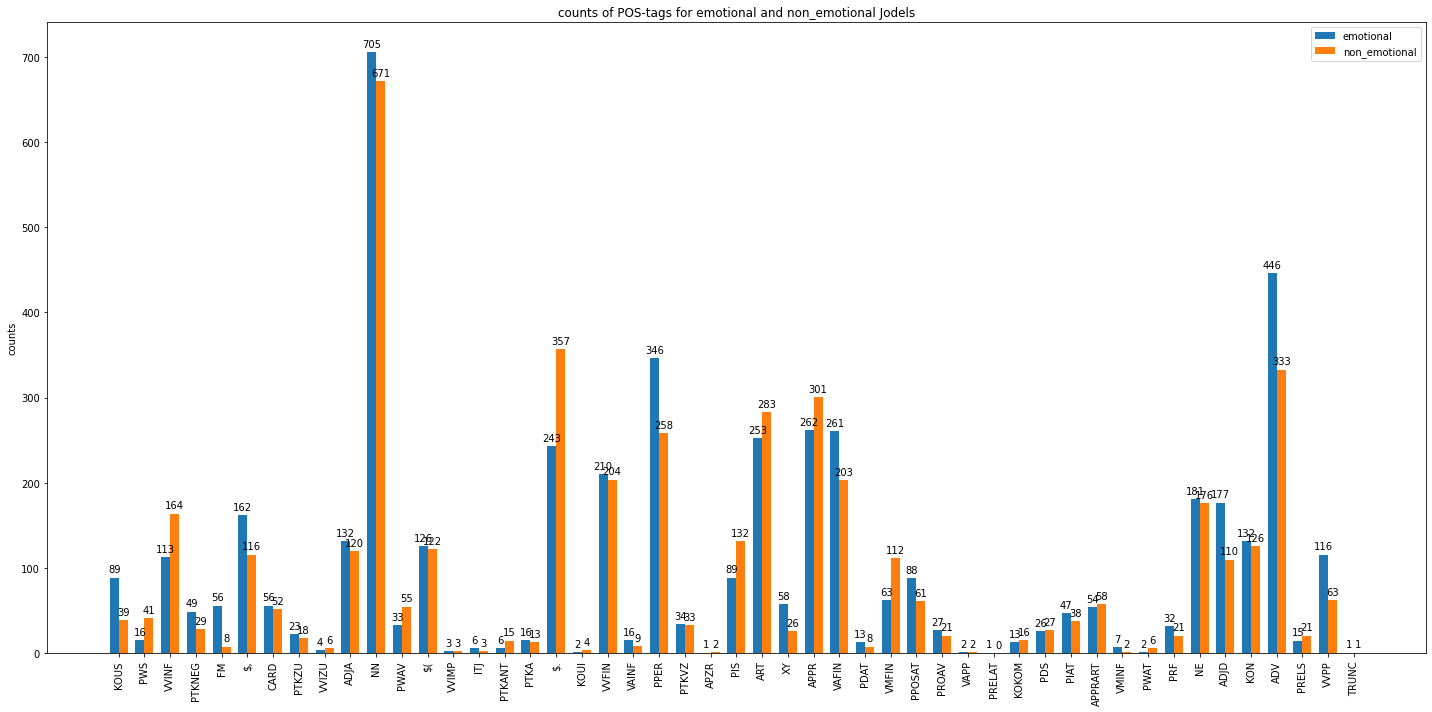

In [151]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = emoji_tags
emotional = emoj_count_emot
non_emotional = emoj_count_non_emot

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
color = (0.2, 0.4)
#plt.figure(figsize=(30,50))
fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, emotional, width, label='emotional')
rects2 = ax.bar(x + width/2, non_emotional, width, label='non_emotional')
#plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('counts')
ax.set_title('counts of POS-tags for emotional and non_emotional Jodels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig("JHJ_EMOJI_postag_distribution.jpg")
#ig.savefig('temp.png', dpi=fig.dpi)


In [92]:
#ergebnisse falsch, weil klassen nicht gleich groß^^ jetzt passts
len(not_jhj_emoji)#228
len(jhj_emoji)#631

228